<div style='background-color: #ffd7ba; padding: 10px;'></div>

<br> 
​
<div class="alert alert-info"><b>LONDON AIRBNB LISTING MARCH 2023</b> 
​

<br> 

<div class="alert alert-warning"><b>CONTEXT</b> 

The AirBnB data file encompasses all the necessary information to explore hosts, geographical availability, and key metrics for making predictions and drawing conclusions.
    
The objective of our analysis is to gain insights into the factors influencing listing activity in London and to identify patterns or trends that could inform pricing, availability, and review ratings.

**We want to answer to** : 
    
- How does the property type affect pricing and availability in different areas of London?

- Are there any correlations between review scores and price?

- How do the number of reviews and review scores impact the popularity and success of listings?

- Are there any specific neighborhoods or locations in London that tend to attract more listing activity?
    
**Organization of the analysis** : 
 
- Loading and exploring the dataset to understand the structure and the available variables.

- Perform data cleaning and preprocessing as needed, handling missing values, outliers, and data inconsistencies.
    
- Conduct exploratory data analysis to identify patterns, distributions, and relationships between variables and answer the specific questions we've identified.
    
- Visualize our findings using appropriate charts, graphs, and plots to effectively communicate our insights and summarize our key findings, draw conclusions, and provide recommendations based on our analysis.

# IMPORT LIBRARIES AND DATA

In [1]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection

import seaborn as sns
sns.set()

from collections import Counter

import scipy.stats as stats
from scipy.stats import zscore 


import warnings
warnings.filterwarnings('ignore')

In [2]:
file_path = r"C:\Users\BDS CREATIONS\OneDrive\Bureau\OPEN CLASS ROOM\DOSSIER PYTHON\listings.csv.gz"
# Read the compressed CSV file into a pandas DataFrame
london = pd.read_csv(file_path)

# Let's take a look at the DataFrame.
london.head()

id                                      listing_url  \
0  714569379355913481  https://www.airbnb.com/rooms/714569379355913481   
1  808038970516277767  https://www.airbnb.com/rooms/808038970516277767   
2  822557738577472503  https://www.airbnb.com/rooms/822557738577472503   
3             3518856             https://www.airbnb.com/rooms/3518856   
4             4876550             https://www.airbnb.com/rooms/4876550   

        scrape_id last_scraped       source  \
0  20230314070633   2023-03-14  city scrape   
1  20230314070633   2023-03-14  city scrape   
2  20230314070633   2023-03-14  city scrape   
3  20230314070633   2023-03-14  city scrape   
4  20230314070633   2023-03-14  city scrape   

                                                name  \
0            Lovely private bedroom in Muswell Hill.   
1                       Studio Flat  Franklin London   
2   PropertyPlug - 2Bed Flat in Edgware SmartTV WiFi   
3                   Wimbledon Double Bedroom Ensuite   
4  Stunning Apartment 2 minutes walk to Tube Station   

                                         description neighborhood_overview  \
0    Take a break and unwind at this peaceful oasis.                   NaN   
1  Brand New Modern Kitchen<br />Close to Excelle...                   NaN   
2  Enjoy easy access to everything from this perf...                   NaN   
3  A welcoming and stylish 2 bedroom 2 bathroom f...                   NaN   
4  Luxury Modern Apartment in modern development ...                   NaN   

                                         picture_url    host_id  ...  \
0  https://a0.muscache.com/pictures/miso/Hosting-...   39009854  ...   
1  https://a0.muscache.com/pictures/miso/Hosting-...  495977998  ...   
2  https://a0.muscache.com/pictures/d77957d5-695a...  325629338  ...   
3  https://a0.muscache.com/pictures/23a18442-fc1d...     187811  ...   
4  https://a0.muscache.com/pictures/miso/Hosting-...   25087384  ...   

  review_scores_communication review_scores_location review_scores_value  \
0                         NaN                    NaN                 NaN   
1                         NaN                    NaN                 NaN   
2                         NaN                    NaN                 NaN   
3                         5.0                   3.67                3.67   
4                         NaN                    NaN                 NaN   

  license instant_bookable calculated_host_listings_count  \
0     NaN                f                              1   
1     NaN                t                              7   
2     NaN                t                              4   
3     NaN                f                              2   
4     NaN                f                              1   

  calculated_host_listings_count_entire_homes  \
0                                           0   
1                                           7   
2                                           4   
3                                           0   
4                                           1   

  calculated_host_listings_count_private_rooms  \
0                                            1   
1                                            0   
2                                            0   
3                                            2   
4                                            0   

  calculated_host_listings_count_shared_rooms reviews_per_month  
0                                           0               NaN  
1                                           0               NaN  
2                                           0               NaN  
3                                           0              0.05  
4                                           0               NaN  

[5 rows x 75 columns]

In [3]:
london.tail()

id                                      listing_url  \
75236  654949753111689538  https://www.airbnb.com/rooms/654949753111689538   
75237  827653589245352551  https://www.airbnb.com/rooms/827653589245352551   
75238            29625947            https://www.airbnb.com/rooms/29625947   
75239            21700003            https://www.airbnb.com/rooms/21700003   
75240  599135204165144789  https://www.airbnb.com/rooms/599135204165144789   

            scrape_id last_scraped           source  \
75236  20230314070633   2023-03-14      city scrape   
75237  20230314070633   2023-03-14      city scrape   
75238  20230314070633   2023-03-15  previous scrape   
75239  20230314070633   2023-03-15  previous scrape   
75240  20230314070633   2023-03-14      city scrape   

                                                   name  \
75236              small but nice studio flat in London   
75237  Huge Period 1-bed, 2-bath, Patio, Great Location   
75238      Bright double room Greenwich for solo female   
75239     Quiet and spacious room in garden flat London   
75240   Well appointed Double Bedroom in Central London   

                                             description  \
75236  Hello this is a nice studio flat in Willesden ...   
75237  Treat yourself and stay in this large 1-bedroo...   
75238  A bright spacious room in a small apartment id...   
75239  The flat is newly refurbished with wooden floo...   
75240  This stylish and unique place sets the stage f...   

                                   neighborhood_overview  \
75236                                                NaN   
75237  More of a village than a town, De Beauvoir Tow...   
75238  The apartment forms part of new development, 1...   
75239                                                NaN   
75240  Pitched perfectly in St Johns Wood, off the hi...   

                                             picture_url    host_id  ...  \
75236  https://a0.muscache.com/pictures/miso/Hosting-...   57989340  ...   
75237  https://a0.muscache.com/pictures/miso/Hosting-...  500054646  ...   
75238  https://a0.muscache.com/pictures/4ba62073-741c...  220181495  ...   
75239  https://a0.muscache.com/pictures/59d1fdaa-e9f0...   85694169  ...   
75240  https://a0.muscache.com/pictures/ee06c309-c339...  451620085  ...   

      review_scores_communication review_scores_location review_scores_value  \
75236                        5.00                   4.70                4.35   
75237                        3.00                   5.00                5.00   
75238                         NaN                    NaN                 NaN   
75239                        5.00                   5.00                5.00   
75240                        3.89                   4.63                4.21   

      license instant_bookable calculated_host_listings_count  \
75236     NaN                f                             76   
75237     NaN                t                              1   
75238     NaN                f                              1   
75239     NaN                f                              2   
75240     NaN                t                              6   

      calculated_host_listings_count_entire_homes  \
75236                                          68   
75237                                           1   
75238                                           0   
75239                                           0   
75240                                           0   

      calculated_host_listings_count_private_rooms  \
75236                                            6   
75237                                            0   
75238                                            1   
75239                                            2   
75240                                            6   

      calculated_host_listings_count_shared_rooms reviews_per_month  
75236                                           2              2.72  
75237                            

# EXPLORE THE DATA

In [4]:
# Let's discover the size of our DataFrame.
london.shape

(75241, 75)

In [5]:
# What are the column names ? 
london.columns.tolist()

['id',
 'listing_url',
 'scrape_id',
 'last_scraped',
 'source',
 'name',
 'description',
 'neighborhood_overview',
 'picture_url',
 'host_id',
 'host_url',
 'host_name',
 'host_since',
 'host_location',
 'host_about',
 'host_response_time',
 'host_response_rate',
 'host_acceptance_rate',
 'host_is_superhost',
 'host_thumbnail_url',
 'host_picture_url',
 'host_neighbourhood',
 'host_listings_count',
 'host_total_listings_count',
 'host_verifications',
 'host_has_profile_pic',
 'host_identity_verified',
 'neighbourhood',
 'neighbourhood_cleansed',
 'neighbourhood_group_cleansed',
 'latitude',
 'longitude',
 'property_type',
 'room_type',
 'accommodates',
 'bathrooms',
 'bathrooms_text',
 'bedrooms',
 'beds',
 'amenities',
 'price',
 'minimum_nights',
 'maximum_nights',
 'minimum_minimum_nights',
 'maximum_minimum_nights',
 'minimum_maximum_nights',
 'maximum_maximum_nights',
 'minimum_nights_avg_ntm',
 'maximum_nights_avg_ntm',
 'calendar_updated',
 'has_availability',
 'availability_30

In [6]:
# A more comprehensive overview of the df
london.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75241 entries, 0 to 75240
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            75241 non-null  int64  
 1   listing_url                                   75241 non-null  object 
 2   scrape_id                                     75241 non-null  int64  
 3   last_scraped                                  75241 non-null  object 
 4   source                                        75241 non-null  object 
 5   name                                          75210 non-null  object 
 6   description                                   73816 non-null  object 
 7   neighborhood_overview                         41760 non-null  object 
 8   picture_url                                   75241 non-null  object 
 9   host_id                                       75241 non-null 

> There are many columns that we don't need. We're doing some cleaning.

In [7]:
london = london[['host_id','host_name','host_since',
                 'name','description',
                'host_response_time', 'host_response_rate', 
                'host_acceptance_rate','longitude','latitude',
                'neighborhood_overview','neighbourhood_cleansed',
                'property_type','room_type','accommodates','bedrooms','beds','amenities',
                'price','minimum_nights', 'maximum_nights', 'minimum_nights_avg_ntm','maximum_nights_avg_ntm',
                'reviews_per_month', 'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d',
                'review_scores_rating','instant_bookable']]
london.head()

host_id host_name  host_since  \
0   39009854   Forough  2015-07-20   
1  495977998   Hussein  2023-01-14   
2  325629338      Paul  2020-01-08   
3     187811     Nikki  2010-08-01   
4   25087384    Joseph  2014-12-22   

                                                name  \
0            Lovely private bedroom in Muswell Hill.   
1                       Studio Flat  Franklin London   
2   PropertyPlug - 2Bed Flat in Edgware SmartTV WiFi   
3                   Wimbledon Double Bedroom Ensuite   
4  Stunning Apartment 2 minutes walk to Tube Station   

                                         description  host_response_time  \
0    Take a break and unwind at this peaceful oasis.                 NaN   
1  Brand New Modern Kitchen<br />Close to Excelle...      within an hour   
2  Enjoy easy access to everything from this perf...      within an hour   
3  A welcoming and stylish 2 bedroom 2 bathroom f...                 NaN   
4  Luxury Modern Apartment in modern development ...  within a few hours   

  host_response_rate host_acceptance_rate  longitude   latitude  ...  \
0                NaN                  NaN  -0.139330  51.597280  ...   
1               100%                 100%  -0.177475  51.636518  ...   
2               100%                  91%  -0.277400  51.608180  ...   
3                NaN                 100%  -0.188410  51.422310  ...   
4                75%                  46%  -0.193606  51.602282  ...   

  minimum_nights maximum_nights minimum_nights_avg_ntm maximum_nights_avg_ntm  \
0              1            365                    1.0                  365.0   
1            180            365                  180.0                  365.0   
2              2             28                    2.0                 1125.0   
3              5           1125                    5.0                 1125.0   
4              5             90                    5.0                 1125.0   

   reviews_per_month  number_of_reviews  number_of_reviews_ltm  \
0                NaN                  0                      0   
1                NaN                  0                      0   
2                NaN                  0                      0   
3               0.05                  4                      0   
4                NaN                  0                      0   

  number_of_reviews_l30d review_scores_rating  instant_bookable  
0                      0                  NaN                 f  
1                      0                  NaN                 t  
2                      0                  NaN                 t  
3                      0                 3.67                 f  
4                      0                  NaN                 f  

[5 rows x 29 columns]

In [8]:
london.info()                     

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75241 entries, 0 to 75240
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   host_id                 75241 non-null  int64  
 1   host_name               75236 non-null  object 
 2   host_since              75236 non-null  object 
 3   name                    75210 non-null  object 
 4   description             73816 non-null  object 
 5   host_response_time      46285 non-null  object 
 6   host_response_rate      46285 non-null  object 
 7   host_acceptance_rate    51028 non-null  object 
 8   longitude               75241 non-null  float64
 9   latitude                75241 non-null  float64
 10  neighborhood_overview   41760 non-null  object 
 11  neighbourhood_cleansed  75241 non-null  object 
 12  property_type           75241 non-null  object 
 13  room_type               75241 non-null  object 
 14  accommodates            75241 non-null

In [9]:
london.isnull().sum()

host_id                       0
host_name                     5
host_since                    5
name                         31
description                1425
host_response_time        28956
host_response_rate        28956
host_acceptance_rate      24213
longitude                     0
latitude                      0
neighborhood_overview     33481
neighbourhood_cleansed        0
property_type                 0
room_type                     0
accommodates                  0
bedrooms                   3473
beds                       1106
amenities                     0
price                         0
minimum_nights                0
maximum_nights                0
minimum_nights_avg_ntm        2
maximum_nights_avg_ntm        2
reviews_per_month         18693
number_of_reviews             0
number_of_reviews_ltm         0
number_of_reviews_l30d        0
review_scores_rating      18693
instant_bookable              0
dtype: int64

In [10]:
# We replace NaN values with 0
london.fillna(0, inplace=True)

In [11]:
pd.set_option('display.max_columns', None)

In [12]:
london.loc[london['name']==0]

host_id         host_name  host_since name  \
347     34923907           Michiel  2015-06-03    0   
348      3914430               Bea  2012-10-18    0   
752     49016292           Miglena  2015-11-14    0   
821    173198187                 D  2018-02-13    0   
1777      806965             Neave  2011-07-11    0   
4062     8601197             Peter  2013-09-03    0   
5876    84273981            Sergio  2016-07-17    0   
8103    19616970            Harald  2014-08-07    0   
8893     2703657              Will  2012-06-21    0   
19763   31393535  Marie-Frédérique  2015-04-17    0   
22767   36687818              Enea  2015-06-25    0   
23832   30091099          Veronica  2015-03-27    0   
24950     949926  Tobias & Annette  2011-08-10    0   
31296    6543986            Joanna  2013-05-23    0   
33255   26885695            Mitsuo  2015-01-29    0   
36143   23728914            Pierre  2014-11-14    0   
37075    2655073            Verena  2012-06-16    0   
37556   27895768            Helena  2015-02-17    0   
39525    4325599               Ian  2012-12-04    0   
40670   24822977           Gregory  2014-12-14    0   
41211    1409439              Alan  2011-11-15    0   
45921   37655947           Olivier  2015-07-06    0   
56670    1409439              Alan  2011-11-15    0   
57159    2876123             Vilma  2012-07-09    0   
59537    1549541               Ben  2011-12-30    0   
60444    1940607            Graham  2012-03-17    0   
61095   37182187              Lily  2015-06-30    0   
61300   21580058           Soledad  2014-09-21    0   
64552    2247541            Stella  2012-04-29    0   
66082   17716960              Adam  2014-07-06    0   
67479    2247541            Stella  2012-04-29    0   

                                             description  host_response_time  \
347    Centrally located room in a shared apartment w...                   0   
348    This is pleasant place near Shoredich and Bric...                   0   
752                                                    0                   0   
821    Self contained flat in small private block. Cl...                   0   
1777   Experience the spirit of London at your pace, ...                   0   
4062   <b>Other things to note</b><br />Two lovely ca...      within an hour   
5876   Hello! The reason why I rent my room for a mon...                   0   
8103   Cosy single room in our flatshare. Located in ...                   0   
8893   Nice apartment in Kentish Town, 5 minutes walk...                   0   
19763  We have a lovely three bedrooms family house i...                   0   
22767  Double room available in shared house. Shared ...                   0   
23832  I have a wonderful Double room avaiable NOW, i...                   0   
24950                                                  0  within a few hours   
31296  A large double-room<br /><br /><b>The space</b...  within a few hours   
33255                                                  0  within a few hours   
36143  Charming En-Suite with a double bed, fully fur...                   0   
37075  Awesome room with a large window front towards...                   0   
37556  Newly built two bedroom two bathroom flat with...                   0   
39525                                                  0      within an hour   
40670  We offer a spacious double bedroom in a superb...                   0   
41211                                                  0  within a few hours   
45921  This very bright cosy flat is located in the h...                   0   
56670                                                  0  within a few hours   
57159  <b>Other things to note</b><br />I have anothe...      within an hour   
59537  Luxurious, duplex apartment set within a gated...      within an hour   
60444  Great room overlooking the garden in a localit...      within an hour   
61095  A newly renovated private double bedroom centr...                   0   
61300  T

<div style='background-color: #ffd7ba; padding: 10px;'> 31 data points are missing in the 'name' column, but all other data are filled. It is worth noting that the room types for these 31 data points are either 'private room' or 'entire home/apt'.</div>

In [13]:
london.name.replace(0, 'NaN', inplace = True)

In [14]:
london.neighbourhood_cleansed.unique().tolist()

['Haringey',
 'Barnet',
 'Harrow',
 'Merton',
 'Croydon',
 'Enfield',
 'Richmond upon Thames',
 'Brent',
 'Kingston upon Thames',
 'Bromley',
 'Wandsworth',
 'Hammersmith and Fulham',
 'Redbridge',
 'Westminster',
 'Bexley',
 'Havering',
 'Sutton',
 'Lambeth',
 'Waltham Forest',
 'Hounslow',
 'Camden',
 'Hillingdon',
 'Islington',
 'Kensington and Chelsea',
 'Lewisham',
 'Ealing',
 'City of London',
 'Greenwich',
 'Hackney',
 'Barking and Dagenham',
 'Southwark',
 'Newham',
 'Tower Hamlets']

In [15]:
print('In the London, there are ',london.neighbourhood_cleansed.nunique(), 'unique hosts neighbourhood.')

In the London, there are  33 unique hosts neighbourhood.


In [16]:
# Let's take a look at the prices of the locations.
# Fist of all, we removed the dollar sign from the 'price' column and changed the data type from 'object' to 'int64'.
london['price'] = london['price'].str.replace('$', '')
london['price'] = london['price'].str.replace(r'\.0+$', '', regex=True)
london['price'] = london['price'].str.replace(',', '')
london['price'] = london['price'].astype('int64')

In [17]:
london.price.dtypes

dtype('int64')

In [18]:
#What are the minimum and maximum prices for Airbnb locations in the London?
print('The minimum price for Airbnb location in London is',london.price.min(),'$.')
print('The maximum price for Airbnb location in London is',london.price.max(),'$.')

The minimum price for Airbnb location in London is 0 $.
The maximum price for Airbnb location in London is 70111 $.


<div style='background-color: #ffd7ba; padding: 10px;'> It seems that we have some outliers in our dataset, as the minimum price is zero and the maximum price is $70,111. After conducting some web research, it appears that there is no available information about a location with such a high price in London. Before we decide to remove this outlier from the dataset, let's investigate further and gather more information about our outliers.</div>

In [19]:
#First of all, we remove columns from the dataset that have 0 values for bedrooms, accommodates, price, and beds.
london = london[london.bedrooms > 0]
london = london[london.accommodates > 0]
london = london[london.price > 0]
london = london[london.beds > 0]

# OUTLIER DETECTION

In [20]:
london.describe()

host_id     longitude      latitude  accommodates      bedrooms  \
count  7.081000e+04  70810.000000  70810.000000  70810.000000  70810.000000   
mean   1.382893e+08     -0.127089     51.509424      3.159836      1.517978   
std    1.538911e+08      0.099607      0.048602      1.960429      0.888124   
min    2.594000e+03     -0.497800     51.296850      1.000000      1.000000   
25%    1.950809e+07     -0.188780     51.482512      2.000000      1.000000   
50%    6.519295e+07     -0.124920     51.513651      2.000000      1.000000   
75%    2.224009e+08     -0.067263     51.539510      4.000000      2.000000   
max    5.050400e+08      0.278960     51.681142     16.000000     22.000000   

               beds         price  minimum_nights  maximum_nights  \
count  70810.000000  70810.000000    70810.000000    7.081000e+04   
mean       1.797161    176.916523        5.727426    8.237743e+03   
std        1.245181    490.209226       24.357418    1.973033e+06   
min        1.000000      1.000000        1.000000    1.000000e+00   
25%        1.000000     60.000000        1.000000    4.000000e+01   
50%        1.000000    100.000000        2.000000    3.650000e+02   
75%        2.000000    181.000000        4.000000    1.125000e+03   
max       38.000000  70111.000000     1125.000000    5.248556e+08   

       minimum_nights_avg_ntm  maximum_nights_avg_ntm  reviews_per_month  \
count            70810.000000            7.081000e+04       70810.000000   
mean                 7.819525            5.841702e+05           0.657393   
std                 32.121146            3.520266e+07           1.129894   
min                  1.000000            1.000000e+00           0.000000   
25%                  1.300000            9.900000e+01           0.010000   
50%                  2.800000            1.125000e+03           0.210000   
75%                  5.000000            1.125000e+03           0.840000   
max               1125.000000            2.147484e+09          51.050000   

       number_of_reviews  number_of_reviews_ltm  number_of_reviews_l30d  \
count       70810.000000           70810.000000            70810.000000   
mean           17.681542               5.646293                0.452408   
std            41.227597              12.835069                1.268154   
min             0.000000               0.000000                0.000000   
25%             1.000000               0.000000                0.000000   
50%             4.000000               0.000000                0.000000   
75%            16.000000               6.000000                0.000000   
max          1328.000000             564.000000               68.000000   

       review_scores_rating  
count          70810.000000  
mean               3.458943  
std                2.094227  
min                0.000000  
25%                0.000000  
50%                4.670000  
75%                4.960000  
max                5.000000

## Boxplot

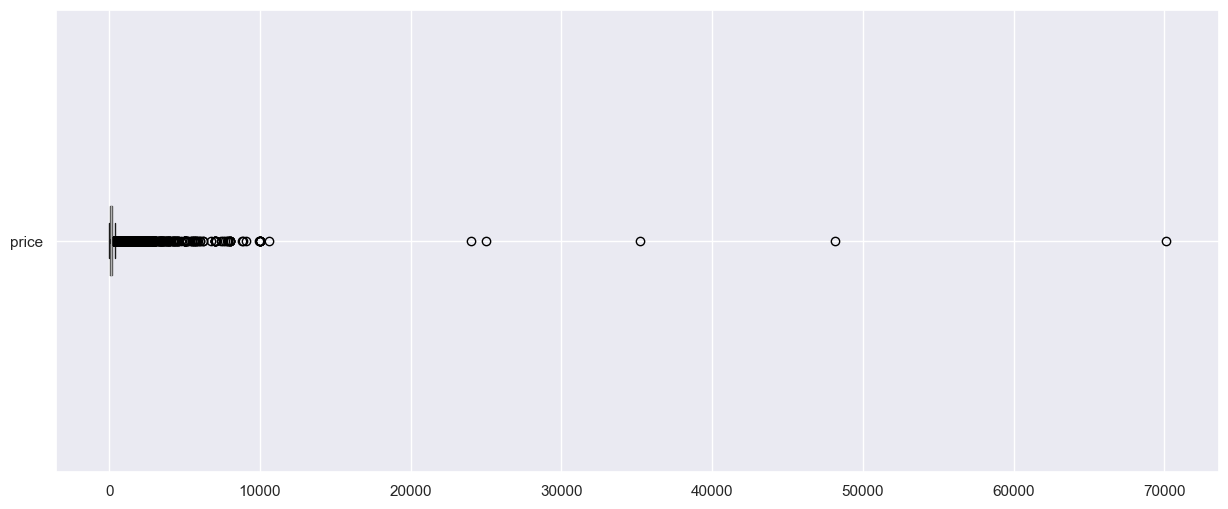

In [21]:
plt.figure(figsize=(15,6))
london.boxplot(column="price", vert=False)
plt.show()

<div style='background-color: #ffd7ba; padding: 10px;'> We can clearly observe the presence of outliers in the data.</div> 

## Scatter plot

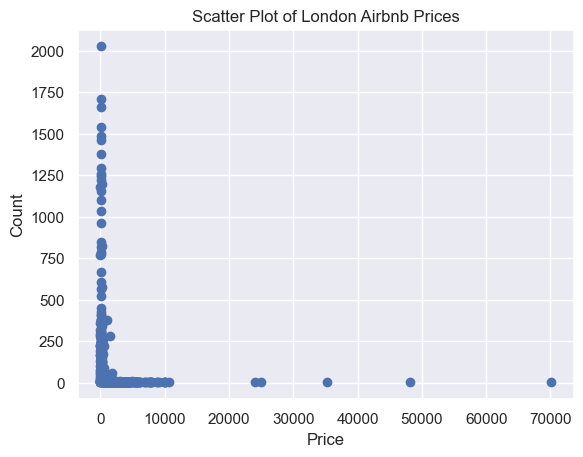

In [22]:
price_counts = london['price'].value_counts()

x = price_counts.index
y = price_counts.values

plt.scatter(x, y)
plt.xlabel('Price')
plt.ylabel('Count')

plt.title('Scatter Plot of London Airbnb Prices')
plt.show()

> > Same observation as with the box plot: we can clearly see the presence of outliers in the data.

<div style='background-color: #ffd7ba; padding: 10px;'>Same observation as with the box plot: we can clearly see the presence of outliers in the data.</div>

## Interquartile range

In [23]:
# Calculation of Q1 and Q3

quartile_1, quartile_3 = np.percentile(london.price,[25,75])
print('The first quartile is', round(quartile_1),'.')
print('The third quartile is', round(quartile_3),'.')

# interquartile range is Q3 - Q1
IQ = quartile_3-quartile_1
print('The interquartile range is', (IQ),'.')

The first quartile is 60 .
The third quartile is 181 .
The interquartile range is 121.0 .


### Determine the threshold values

> > It should be noted that a data point is plotted as an outlier if its value is less than Q1-1.5(Q3-Q1) or greater than Q3+1.5(Q3-Q1).

In [24]:
upper_bound_val = quartile_3 +(1.5*IQ)
lower_bound_val = quartile_1 -(1.5*IQ)
print('The threshold beyond which values are considered outliers and/or extremes is', upper_bound_val,'.')
print('The threshold below which values are considered outliers and/or extremes is ',lower_bound_val,'.')

The threshold beyond which values are considered outliers and/or extremes is 362.5 .
The threshold below which values are considered outliers and/or extremes is  -121.5 .


In [25]:
# Let's define the outlier list
outliers_list = london[(london.price>upper_bound_val) | (london.price<lower_bound_val)]

In [26]:
print('According to the interquartile range method, we detect', len(outliers_list), 'outliers.')

According to the interquartile range method, we detect 5374 outliers.


In [27]:
print(outliers_list.price.min())
print(outliers_list.price.max())

363
70111


>> We have decided not to remove the detected outliers. We will analyze them in a separate dataset at a later stage.

In [28]:
print('The minimum price for Airbnb location London is',london.price.min(),'$.')
print('The maximum price for Airbnb location London is',london.price.max(),'$.')
print('The median price for Airbnb location London is',london.price.median(),'$.')
print('The average price for Airbnb location London is',london.price.mean(),'$.')


The minimum price for Airbnb location London is 1 $.
The maximum price for Airbnb location London is 70111 $.
The median price for Airbnb location London is 100.0 $.
The average price for Airbnb location London is 176.91652308995904 $.


In [29]:
london.loc[london['price'] == 1]

host_id host_name  host_since                                  name  \
1857   3010498   Michael  2012-07-21          Large Private Room in Hoxton   
13901  3010498   Michael  2012-07-21  Private room in Aldgate East Station   
13946  3010498   Michael  2012-07-21  Room with panoramic view and balcony   

                                             description host_response_time  \
1857   Large room in a two-bedroom flat excellently l...       within a day   
13901  Apartment and gated community in a quiet locat...       within a day   
13946  Panoramic 9th floor skyline view. Private Balc...       within a day   

      host_response_rate host_acceptance_rate  longitude  latitude  \
1857                100%                  71%   -0.07370  51.53389   
13901               100%                  71%   -0.07538  51.51627   
13946               100%                  71%   -0.05633  51.51575   

      neighborhood_overview neighbourhood_cleansed  \
1857                      0                Hackney   
13901                     0          Tower Hamlets   
13946                     0          Tower Hamlets   

                     property_type     room_type  accommodates  bedrooms  \
1857         Private room in condo  Private room             2       1.0   
13901        Private room in condo  Private room             1       1.0   
13946  Private room in rental unit  Private room             1       1.0   

       beds                                          amenities  price  \
1857    1.0  ["Washer", "Iron", "Hangers", "First aid kit",...      1   
13901   1.0  ["Washer", "Iron", "Hangers", "Kitchen", "Smok...      1   
13946   1.0  ["Washer", "Iron", "Hangers", "Patio or balcon...      1   

       minimum_nights  maximum_nights  minimum_nights_avg_ntm  \
1857               30            1125                    30.0   
13901              30            1125                    30.0   
13946              30            1125                    30.0   

       maximum_nights_avg_ntm  reviews_per_month  number_of_reviews  \
1857                   1125.0               0.07                  1   
13901                  1125.0               0.00                  0   
13946                  1125.0               0.05                  2   

       number_of_reviews_ltm  number_of_reviews_l30d  review_scores_rating  \
1857                       0                       0                   5.0   
13901                      0                       0                   0.0   
13946                      0                       0                   5.0   

      instant_bookable  
1857                 f  
13901                f  
13946                f

# HOSTS

In [30]:
london.nunique()

host_id                   45681
host_name                 13234
host_since                 4550
name                      68291
description               65044
host_response_time            5
host_response_rate           78
host_acceptance_rate        101
longitude                 39305
latitude                  29872
neighborhood_overview     32814
neighbourhood_cleansed       33
property_type                95
room_type                     4
accommodates                 16
bedrooms                     14
beds                         21
amenities                 62310
price                      1385
minimum_nights              116
maximum_nights              269
minimum_nights_avg_ntm      682
maximum_nights_avg_ntm     1514
reviews_per_month           842
number_of_reviews           447
number_of_reviews_ltm       157
number_of_reviews_l30d       23
review_scores_rating        194
instant_bookable              2
dtype: int64

In [31]:
# We have 13234 unique host name in the entire df. 
london.host_name.duplicated().sum()

57576

In [32]:
# Let's examine the duplicated data in the 'host_name' column.
london.loc[london['host_name'].duplicated(),:]

host_id host_name  host_since  \
19     490795350    Jahmal  2022-12-09   
28     490795350    Jahmal  2022-12-09   
50      27254003      Lucy  2015-02-05   
62      66719515   Jeetesh  2016-04-11   
77     490795350    Jahmal  2022-12-09   
...          ...       ...         ...   
75235   16175110     Jodie  2014-05-30   
75237  500054646    Nicola  2023-02-07   
75238  220181495      Anna  2018-10-12   
75239   85694169      Alex  2016-07-24   
75240  451620085  Kandarap  2022-03-28   

                                                   name  \
19                                      St Peters Space   
28                                       Napier House 2   
50               Double bedroom in leafy Worcester Park   
62           Plz call me on 07776789835 good double bed   
77                                       Pembroke House   
...                                                 ...   
75235                Bright & Stylish 1 Bed flat w/Deck   
75237  Huge Period 1-bed, 2-bath, Patio, Great Location   
75238      Bright double room Greenwich for solo female   
75239     Quiet and spacious room in garden flat London   
75240   Well appointed Double Bedroom in Central London   

                                             description  host_response_time  \
19     This stylish place to stay is perfect for grou...      within an hour   
28     Relax with the whole family at this peaceful p...      within an hour   
50     Double bedroom in flat in leafy Worcester Park...        within a day   
62     Plz note no cooking as no kitchen is provided ...  within a few hours   
77     Take it easy at this unique and tranquil getaway.      within an hour   
...                                                  ...                 ...   
75235  Charming, comfortable, bright flat on the 1st ...  within a few hours   
75237  Treat yourself and stay in this large 1-bedroo...      within an hour   
75238  A bright spacious room in a small apartment id...                   0   
75239  The flat is newly refurbished with wooden floo...                   0   
75240  This stylish and unique place sets the stage f...  within a few hours   

      host_response_rate host_acceptance_rate  longitude   latitude  \
19                   98%                  87%  -0.096813  51.367115   
28                   98%                  87%  -0.097244  51.354910   
50                  100%                    0  -0.242040  51.377720   
62                  100%                 100%  -0.151265  51.627252   
77                   98%                  87%  -0.087640  51.396270   
...                  ...                  ...        ...        ...   
75235               100%                  54%  -0.126080  51.469360   
75237               100%                 100%  -0.088931  51.543923   
75238                  0                    0  -0.012730  51.470630   
75239                  0                    0  -0.129560  51.549530   
75240               100%                  98%  -0.166780  51.534540   

                                   neighborhood_overview  \
19                                                     0   
28                                                     0   
50                                                     0   
62                                                     0   
77                                                     0   
...                                                  ...   
75235  The flat is located walking distance to Clapha...   
75237  More of a village than a town, De Beauvoir Tow...   
75238  The apartment forms part of new development, 1...   
75239                                                  0   
75240  Pitched perfectly in St Johns Wood, off the hi...   

      neighbourhood_cleansed                property_type        room_type  \
19                   Croydon           Entire rental unit  Entire home/apt   
28                   Croydon                  Entire home  Entire home/apt   
50                    Sutt

<div style='background-color: #ffd7ba; padding: 10px;'>A host can have multiple locations.</div>

In [33]:
# How many unique room type do we have in the df?
unique_room_type = london.room_type.nunique()
print("Number of unique room types:", unique_room_type)

Number of unique room types: 4


In [34]:
# What are all the room types of the locations in the df?
london.room_type.unique()

array(['Private room', 'Entire home/apt', 'Shared room', 'Hotel room'],
      dtype=object)

In [35]:
# How many unique property type do we have in the df?
unique_property_types = london.property_type.nunique()
print("Number of unique property types:", unique_property_types)

Number of unique property types: 95


In [36]:
# What is the list and the name of the property types in the df ? 
unique_property_types_name = london.property_type.unique()

print("List of unique property types:")
for property_type in unique_property_types_name:
    print(property_type)

List of unique property types:
Private room in condo
Entire rental unit
Private room in rental unit
Entire condo
Entire home
Private room in bed and breakfast
Private room in home
Entire townhouse
Private room in guesthouse
Entire serviced apartment
Entire vacation home
Entire loft
Shared room
Private room in vacation home
Tiny home
Private room in townhouse
Private room in cottage
Private room in casa particular
Entire guesthouse
Room in boutique hotel
Room in bed and breakfast
Room in aparthotel
Room in hotel
Room in hostel
Private room
Shared room in home
Private room in houseboat
Private room in bungalow
Private room in guest suite
Shared room in rental unit
Shared room in bus
Private room in hostel
Private room in serviced apartment
Private room in loft
Room in serviced apartment
Entire cottage
Shared room in hostel
Private room in tipi
Shared room in condo
Private room in tiny home
Shared room in serviced apartment
Private room in boat
Entire place
Entire chalet
Boat
Shared room 

In [37]:
london.columns

Index(['host_id', 'host_name', 'host_since', 'name', 'description',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'longitude', 'latitude', 'neighborhood_overview',
       'neighbourhood_cleansed', 'property_type', 'room_type', 'accommodates',
       'bedrooms', 'beds', 'amenities', 'price', 'minimum_nights',
       'maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm',
       'reviews_per_month', 'number_of_reviews', 'number_of_reviews_ltm',
       'number_of_reviews_l30d', 'review_scores_rating', 'instant_bookable'],
      dtype='object')

<div class="alert alert-success">
<b>NOTE</b> 

We have 29 columns and 70810 rows in our London Dataset. 

We have information about the name, host name, latitude, and longitude of each host, the description of the location, the neighborhood and the neighborhood overview, the date they first started hosting, location, acceptance rate, property type, room type, price, minimum and maximum nights, availability for 30 and 365 days, number of reviews, review scores rating and more.

**Host response time** refers to the estimated or recorded time taken by a host to respond to an inquiry or message from a potential guest. It indicates the speed or timeliness of the host's response to guest inquiries.

*Host response rate** refers to the percentage of inquiries or messages that a host has responded to. It indicates the host's level of responsiveness to guest inquiries.

**Host acceptance rate** refers to the percentage of booking requests that a host accepts. It indicates the host's willingness to accept and confirm reservations from guests.
 
**Minimum night** refers to the minimum number of nights that guests are required to book when making a reservation for a particular listing. It indicates the minimum duration of stay set by the host for that specific property.
    
**Maximum night** refers to the maximum number of nights that guests are allowed to book when making a reservation for a particular listing. It indicates the maximum duration of stay set by the host for that specific property.

**Availability for 30** refers to the number of days within the next 30 days that a particular listing is available for booking. It indicates the availability or vacancy of the listing for potential guests over a period of 30 days starting from the current date.
    
**Availability for 365** refers to the number of days within the next 365 days that a particular listing is available for booking. It indicates the availability or vacancy of the listing for potential guests over a period of 365 days starting from the current date.

**Number of reviews** refers to the total count of reviews that have been submitted by guests for a particular listing. It represents the feedback and opinions shared by previous guests about their experience staying at that specific property. The number of reviews can provide an indication of the popularity, quality, and overall satisfaction of the listing.

**Number of review scores rating** refers to the total count of review scores given by guests for a particular listing. It represents the number of ratings provided by guests regarding their experience staying at that specific property. These review scores ratings typically indicate the level of satisfaction or quality of the listing, as provided by previous guests.

**Instant bookable** refers to a property's availability for immediate booking without the need for host approval or confirmation. If a listing is marked as "Instant bookable," it means that guests can make a reservation for that property directly and have it instantly confirmed, without waiting for the host's approval.
    
We have 13234 unique host names in the entire df. It is possible for a host to have multiple host locations.
    
The 'name' refers to the name of the location (such as home, apartment, hotel, etc.). It is possible to have multiple locations at the same place with the same name.
    
There are 4 room types for locations : Private room, Entire home/apt, Shared room, Hotel room.
    
There are 95 property types for locations including 'Private room in condo', 'Entire rental unit', 'Private room in rental unit', 'Entire condo', 'Entire home', 'Private room in bed and breakfast', 'Private room in home' and more. 
    

</div>

## Host response time

>> The "host_response_time" field typically contains categories or labels that represent different response time ranges, such as:

    - "within an hour": The host usually responds to inquiries within an hour.
    - "within a few hours": The host typically responds to inquiries within a few hours.
    - "within a day": The host generally responds to inquiries within a day.
    - "a few days or more": The host may take a few days or more to respond to inquiries.
> This information helps guests understand the host's communication habits and expectations regarding response times. It can be useful for guests who prioritize quick responses or have time-sensitive inquiries.

In [38]:
london.host_response_time.unique()

array([0, 'within an hour', 'within a few hours', 'within a day',
       'a few days or more'], dtype=object)

### Counts of host response time

In [39]:
# Number of host repsonse time
print("Number of host response time :", len(london["host_response_time"].unique()))
print()
print("host_response_time|Listings")
# Number of listings of each room type
print(london["host_response_time"].value_counts())

Number of host response time : 5

host_response_time|Listings
within an hour        28302
0                     27294
within a few hours     8465
within a day           5575
a few days or more     1174
Name: host_response_time, dtype: int64


In [40]:
london2 = london

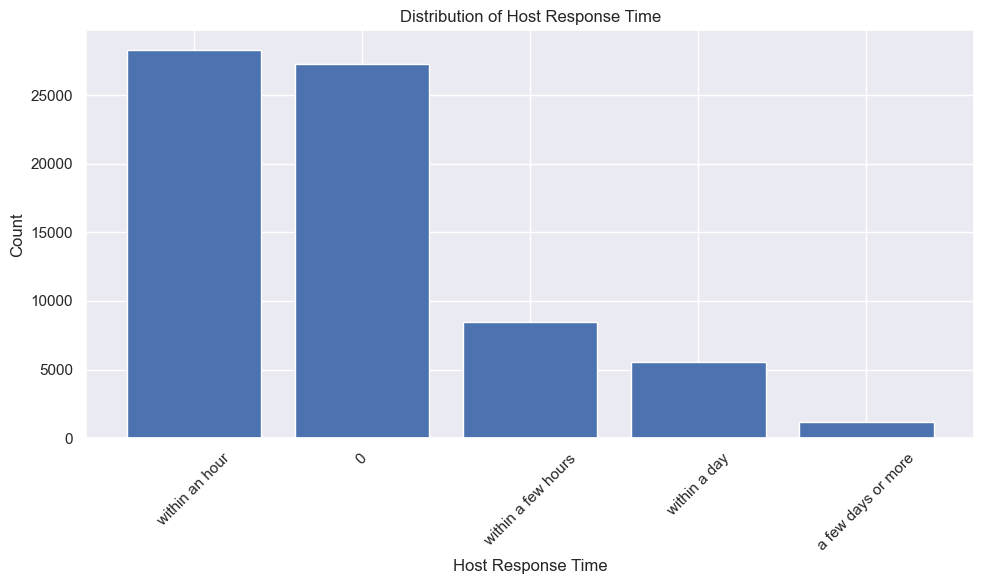

In [41]:
london2['host_response_time'] = london2['host_response_time'].astype(str)

# Count the occurrences of each response time category
response_time_counts = london2['host_response_time'].value_counts()

# Create the bar chart
plt.figure(figsize=(10, 6))
plt.bar(response_time_counts.index, response_time_counts.values)
plt.xlabel('Host Response Time')
plt.ylabel('Count')
plt.title('Distribution of Host Response Time')
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.tight_layout()
plt.show()

> 1 - The 'host response time' column contains a substantial number of null values (27,294). This suggests that a significant portion of hosts did not provide a response time or it was not recorded in the dataset.

> 2 - Among the hosts who did provide a response time, the majority answered within an hour. This indicates that a significant proportion of hosts are prompt in responding to inquiries or messages from potential guests.

### Host response time and price

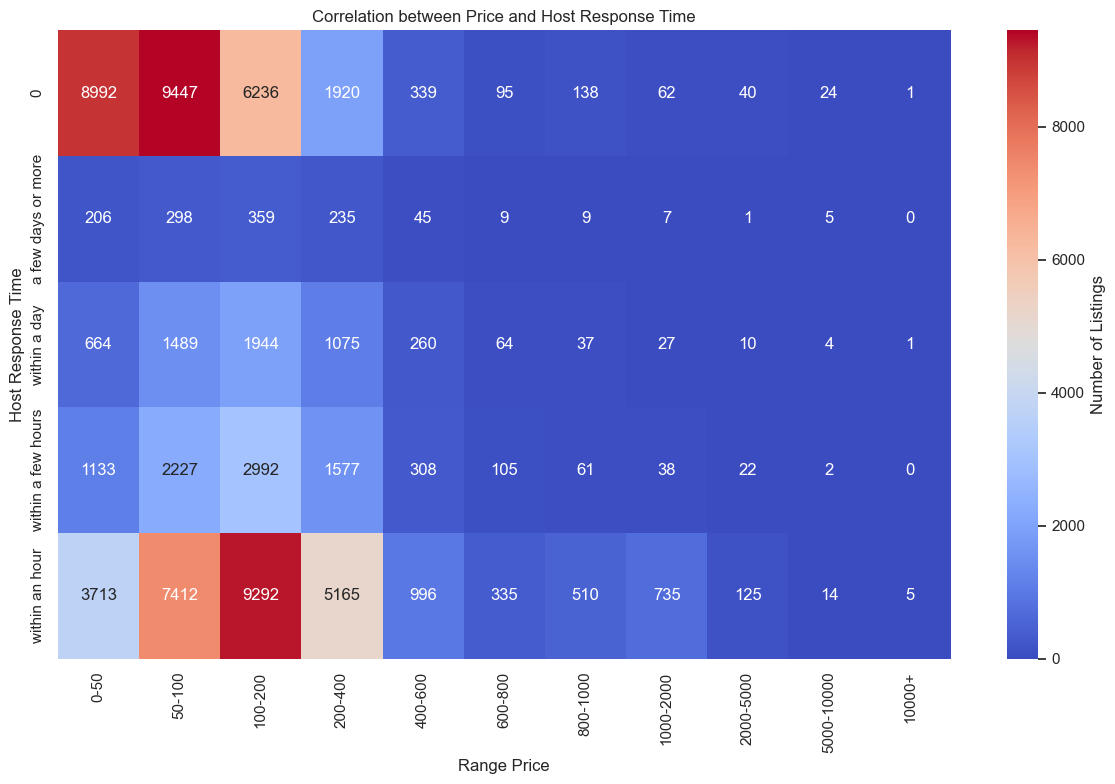

In [42]:
london2['range_price']= pd.cut(x=london2['price'], bins=[0,50,100,200,400,600,800,1000,2000,5000, 10000, 70111], 
                                labels = ['0-50', '50-100', '100-200', '200-400', '400-600','600-800', '800-1000', '1000-2000','2000-5000','5000-10000','10000+']) 


# Create a crosstab between 'host response time' and 'price'
ct = pd.crosstab(london2['host_response_time'],london2['range_price'])


# Create the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(ct, cmap='coolwarm', annot=True, fmt='d', cbar_kws={'label': 'Number of Listings'})
plt.xlabel('Range Price')
plt.ylabel('Host Response Time')
plt.title('Correlation between Price and Host Response Time')
plt.tight_layout()
plt.show()



> 1. **Host Response Time:** The majority of hosts responded within an hour, indicating that a significant proportion of hosts are prompt in attending to inquiries or messages from potential guests. This quick response time could positively impact guest satisfaction and booking rates.

> 2. **Correlation with Price:** The heatmap suggests that there is a correlation between the 'host response time' and 'price' variables. Specifically, a considerable number of responses within an hour are associated with listings in the price range of 100 to 200$. This correlation might indicate that hosts offering properties within this price range are more likely to respond promptly to inquiries, potentially enhancing the overall guest experience.

However, it's important to note that correlation does not necessarily imply causation. While the heatmap shows a relationship between response time and price, additional factors could contribute to this correlation. For a more comprehensive understanding, further analysis and consideration of other variables, such as property type, location, or guest reviews, would be valuable.

In conclusion, the data suggests that a swift host response time is prevalent within the analyzed dataset, and there appears to be a connection between response time and the price range of listings. Understanding and optimizing response times can be crucial for hosts in the Airbnb platform to attract guests and enhance the overall guest experience. To gain deeper insights and draw definitive conclusions, more in-depth analysis and exploration of other relevant variables are recommended.

## Host response rate & Host acceptance rate

>> The "host_response_rate" field typically represents the proportion of messages or inquiries that the host has replied to within a certain timeframe. It is expressed as a percentage.

For example, if the "host_response_rate" is 80%, it means that the host has responded to approximately 80% of the messages or inquiries they have received.

This metric helps guests gauge the host's communication engagement and responsiveness. A higher response rate generally suggests that the host is more proactive and attentive to guest inquiries, while a lower response rate may indicate that the host is less responsive or takes longer to reply.

>> The "host_acceptance_rate" field represents the ratio of accepted booking requests to the total number of booking requests received by the host. It is expressed as a percentage.

For example, if the "host_acceptance_rate" is 90%, it means that the host accepts approximately 90% of the booking requests they receive.

This metric provides insight into the host's tendency to accept or decline booking requests. A higher acceptance rate suggests that the host is more likely to approve guest reservations, while a lower acceptance rate indicates that the host may be more selective or less inclined to accept bookings.

## Hosts by room type 

Number of room types : 4

Hosts by room type : 
Entire home/apt    42663
Private room       27601
Shared room          382
Hotel room           164
Name: room_type, dtype: int64

Entire home/apt: 60.2%
Private room: 39.0%
Shared room: 0.5%
Hotel room: 0.2%


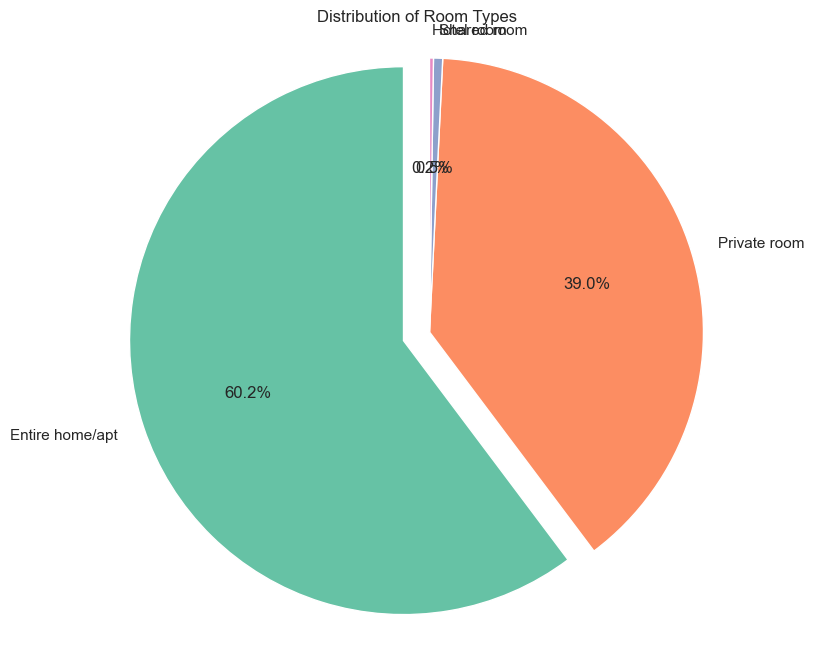

In [43]:
# Number of room types
print("Number of room types :", len(london["room_type"].unique()))
print()
room_type_counts = london['room_type'].value_counts()
room_types = ['Entire home/apt', 'Private room', 'Shared room', 'Hotel room']

# Number of listings of each room type
print('Hosts by room type : ')
print(room_type_counts),
print()

# Print the percentages
total_count = sum(room_type_counts)
percentages = [count/total_count * 100 for count in room_type_counts]

for room_type, percentage in zip(room_types, percentages):
    print(f"{room_type}: {percentage:.1f}%")

# Set up the figure and axes
fig, ax = plt.subplots(figsize=(8, 8))

# Create a pie plot
explode = (0.1, 0, 0, 0)  # Explode the first slice (optional)
colors = sns.color_palette("Set2")
ax.pie(room_type_counts, labels=room_type_counts.index, autopct='%1.1f%%', explode=explode, colors=colors, startangle=90)

# Set aspect ratio to make the pie circular
ax.axis('equal')

# Add a title
ax.set_title('Distribution of Room Types')

# Display the plot
plt.show()

<div class="alert alert-success">
<b>NOTE</b> 

As we can see from the plot, the majority of the locations fall into the categories of "Entire home/apt" and "Private room," followed by "Shared room" and "Hotel," which have a much lower count.

## Hosts by property type

In [44]:
# Number of property types
print("Number of property types :", len(london["property_type"].unique()))

Number of property types : 95


Entire rental unit                   24331
Private room in rental unit          12017
Private room in home                  8657
Entire condo                          8306
Entire home                           5997
                                     ...  
Shared room in religious building        1
Minsu                                    1
Castle                                   1
Shared room in guest suite               1
Room in rental unit                      1
Name: property_type, Length: 95, dtype: int64


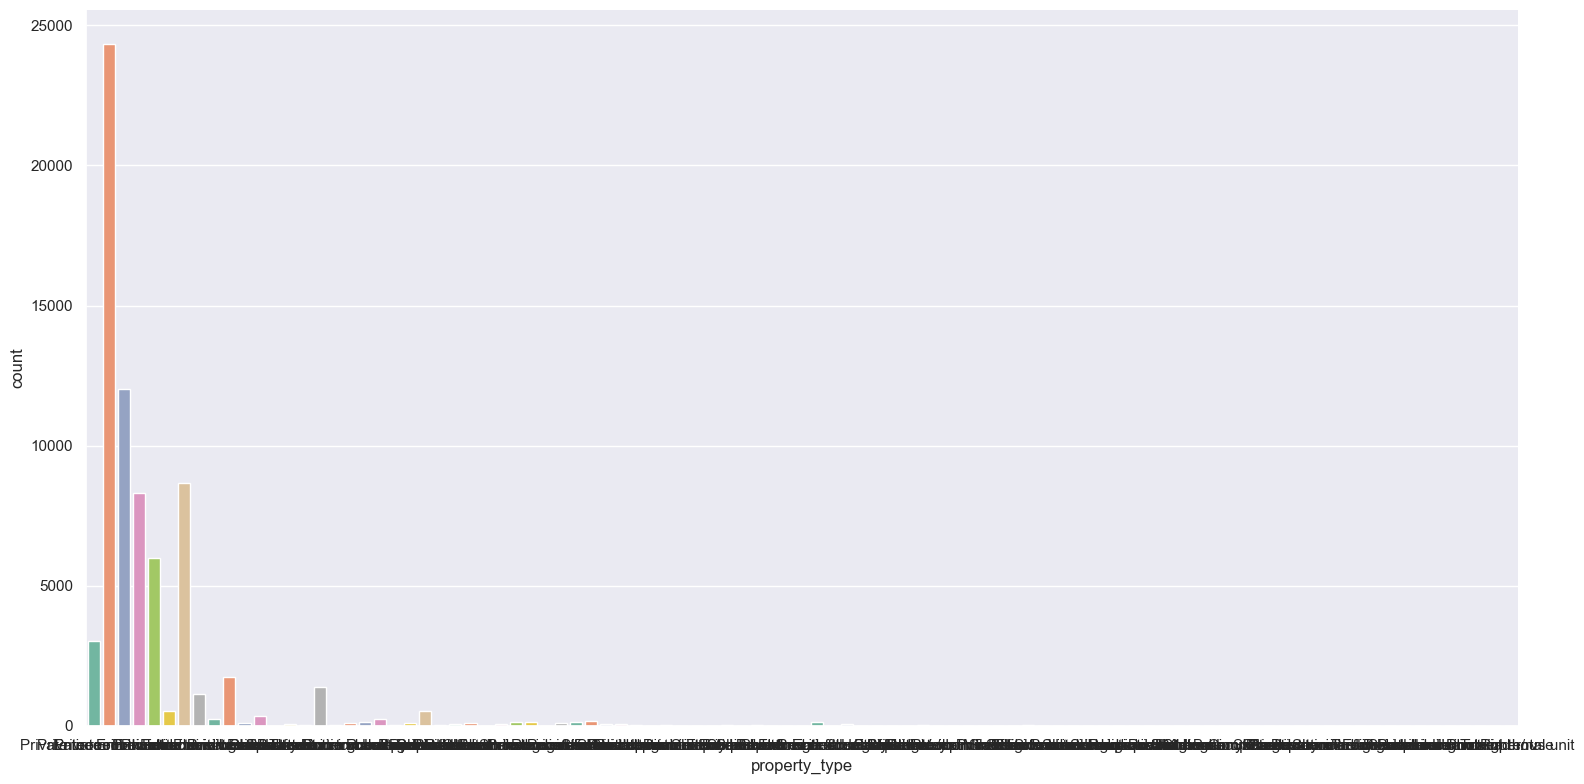

In [45]:
# Number of listings of each property type
print(london["property_type"].value_counts())
sns.catplot(x = "property_type", data = london, kind = "count", palette="Set2", height = 8, aspect = 2)

> We have no visibility because there are too much property type. We reduce to 15 property type. 

Entire rental unit                   24331
Private room in rental unit          12017
Private room in home                  8657
Entire condo                          8306
Entire home                           5997
Private room in condo                 3030
Entire serviced apartment             1759
Private room in townhouse             1373
Entire townhouse                      1125
Room in hotel                          535
Private room in bed and breakfast      524
Entire loft                            340
Private room in guesthouse             254
Room in boutique hotel                 245
Private room in loft                   166
Name: property_type, dtype: int64


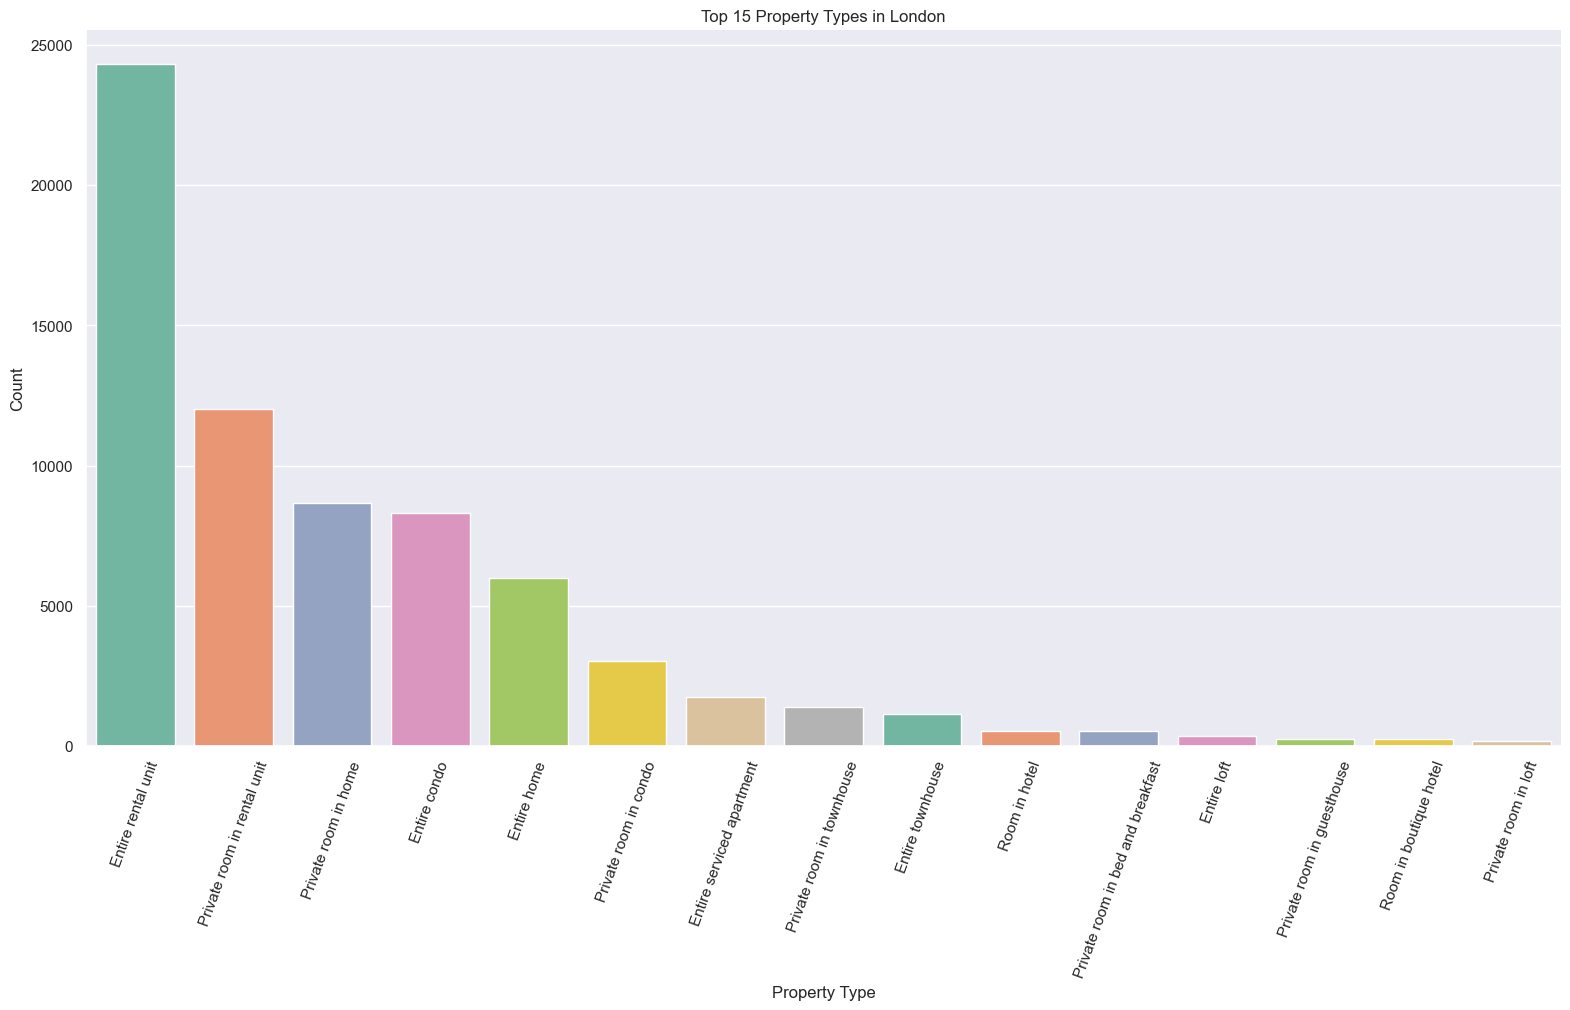

In [46]:
# Number of listings of top 15 property type
top_15_property_types = london["property_type"].value_counts().head(15)
print(top_15_property_types)

sns.catplot(x="property_type", data=london, kind="count", palette="Set2", height=8, aspect=2, order=top_15_property_types.index)
plt.xticks(rotation=70)
plt.xlabel('Property Type')
plt.ylabel('Count')
plt.title('Top 15 Property Types in London')
plt.show()

<div class="alert alert-success">
<b>NOTE</b> 

We notice that there are a lot more "Entire rental unit" listings than any other property type in London. Based on the previous chart, we can deduce that Airbnb hosts in London prefer to list their properties as entire units rather than private or shared rooms.

# PRICE

In [47]:
# What are the minimum, maximum prices, the median and the average ? 
print('The minimum price for Airbnb location in London is',london.price.min(),'$.')
print('The maximum price for Airbnb location in London is',london.price.max(),'$.')
print('The median price for Airbnb location in London is',london.price.median(),'$.')
print('The average price for Airbnb location in London is',london.price.mean(),'$.')


The minimum price for Airbnb location in London is 1 $.
The maximum price for Airbnb location in London is 70111 $.
The median price for Airbnb location in London is 100.0 $.
The average price for Airbnb location in London is 176.91652308995904 $.


In [48]:
#  We're creating a new column that contains a range of prices based on the existing 'price' column
london['range_price']= pd.cut(x=london['price'], bins=[0,50,100,200,400,600,800,1000,2000,5000, 10000, 70111], 
                                labels = ['0-50', '50-100', '100-200', '200-400', '400-600','600-800', '800-1000', '1000-2000','2000-5000','5000-10000','10000+']) 
london.head(2)

host_id host_name  host_since                                     name  \
0   39009854   Forough  2015-07-20  Lovely private bedroom in Muswell Hill.   
1  495977998   Hussein  2023-01-14             Studio Flat  Franklin London   

                                         description host_response_time  \
0    Take a break and unwind at this peaceful oasis.                  0   
1  Brand New Modern Kitchen<br />Close to Excelle...     within an hour   

  host_response_rate host_acceptance_rate  longitude   latitude  \
0                  0                    0  -0.139330  51.597280   
1               100%                 100%  -0.177475  51.636518   

  neighborhood_overview neighbourhood_cleansed          property_type  \
0                     0               Haringey  Private room in condo   
1                     0                 Barnet     Entire rental unit   

         room_type  accommodates  bedrooms  beds  \
0     Private room             1       1.0   1.0   
1  Entire home/apt             1       1.0   1.0   

                                           amenities  price  minimum_nights  \
0  ["Iron", "Hangers", "Hair dryer", "Outdoor din...    100               1   
1                                                 []     65             180   

   maximum_nights  minimum_nights_avg_ntm  maximum_nights_avg_ntm  \
0             365                     1.0                   365.0   
1             365                   180.0                   365.0   

   reviews_per_month  number_of_reviews  number_of_reviews_ltm  \
0                0.0                  0                      0   
1                0.0                  0                      0   

   number_of_reviews_l30d  review_scores_rating instant_bookable range_price  
0                       0                   0.0                f      50-100  
1                       0                   0.0                t      50-100

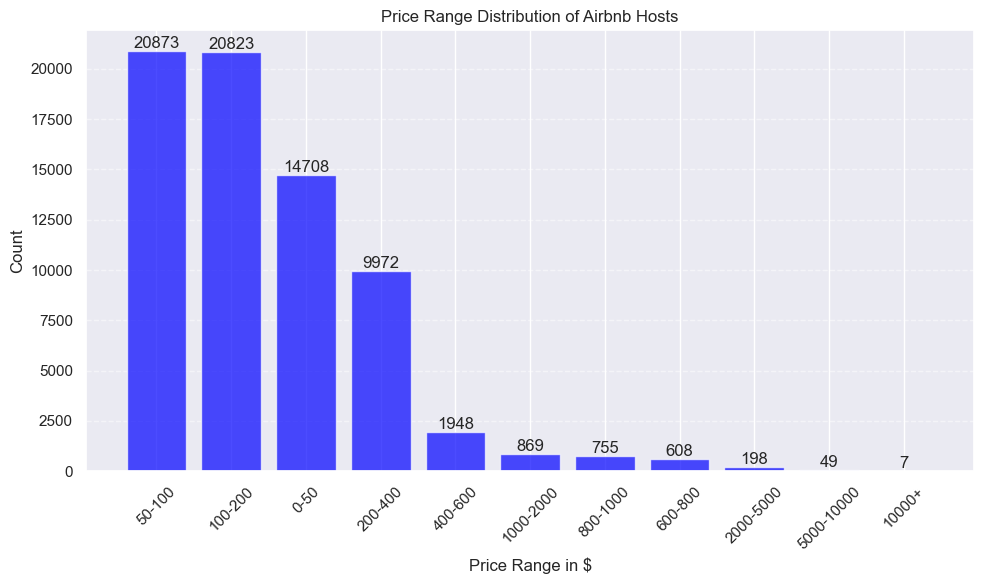

In [49]:
# Let's gain insight into the price range of Airbnb hosts in London.

# Count the occurrences of each price range
price_counts = london['range_price'].value_counts()

# Create a histogram
plt.figure(figsize=(10, 6))
bars = plt.bar(price_counts.index, price_counts.values, color='blue', alpha=0.7)

# Add data labels to the bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, height, ha='center', va='bottom')

plt.xlabel('Price Range in $')
plt.ylabel('Count')
plt.title('Price Range Distribution of Airbnb Hosts')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

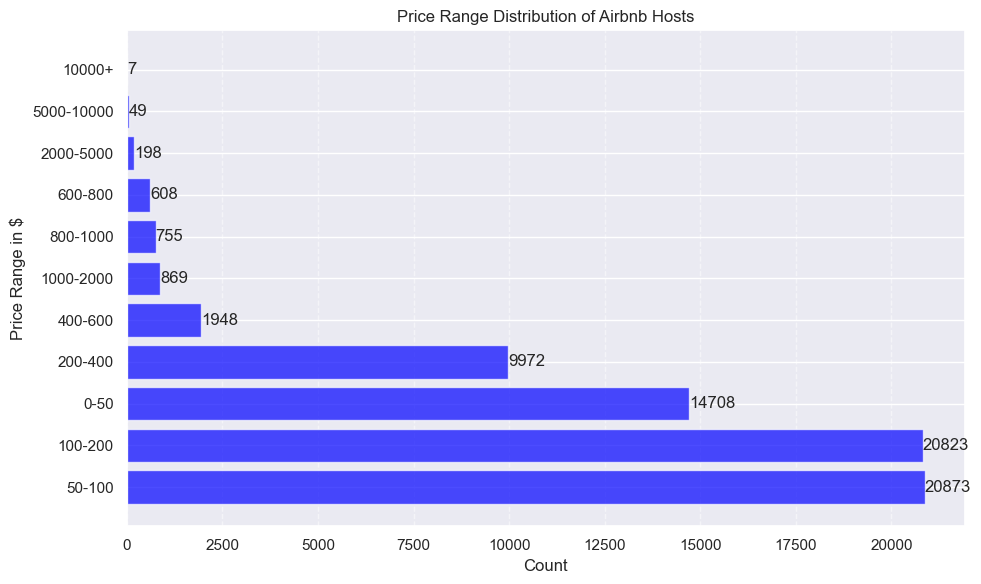

In [50]:
# Create a vertical histogram
plt.figure(figsize=(10, 6))
plt.barh(price_counts.index, price_counts.values, color='blue', alpha=0.7)

# Add data labels to the bars
for i, value in enumerate(price_counts.values):
    plt.text(value, i, str(value), ha='left', va='center')

plt.xlabel('Count')
plt.ylabel('Price Range in $')
plt.title('Price Range Distribution of Airbnb Hosts')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

<div class="alert alert-success">
<b>NOTE</b> 

First of all, we can observe that the majority of Airbnb locations in London fall within the price range of 50 to 100 and 100 to $200. 

Specifically, we have 20873 hosts with prices between 50 and 100, and 20823 hosts with prices between 100 and $200.

It is worth noting that there are only 7 hosts with prices equal to or exceeding $10,000.


## Price by room type and property type 

In [51]:
# We are first creating a new DataFrame with only the top 15 property types.
top_property_types = london['property_type'].value_counts().head(15).index
new_london = london[london['property_type'].isin(top_property_types)]

# Then we analyze the mean prices for different room types and the top 15 property types.
room_property = new_london.groupby(['property_type','room_type']).price.mean()
room_property = room_property.reset_index()
room_property=room_property.sort_values('price',ascending=[0])
room_property.head()

property_type        room_type       price
15              Room in hotel       Hotel room  356.230769
4   Entire serviced apartment  Entire home/apt  332.940307
5            Entire townhouse  Entire home/apt  324.007111
1                 Entire home  Entire home/apt  319.574287
14     Room in boutique hotel     Private room  287.219512

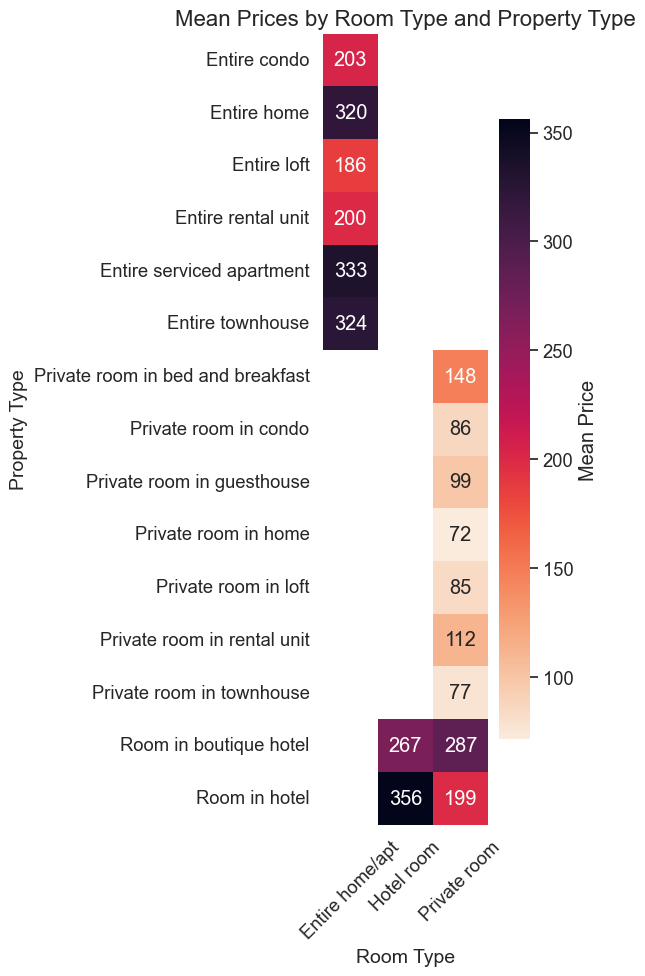

In [52]:
# Let's visualize the mean prices for different room types and property types using a Heatmap to gain more visibility.
plt.figure(figsize=(6, 10))
cmap = sns.cm.rocket_r  # Choose a color palette (reverse rocket)

# Customize the heatmap style
sns.set(font_scale=1.2)  # Adjust font size
sns.set_style("whitegrid")  # Set a white grid background

# Create the heatmap with mean prices
heatmap_data = room_property.groupby(['property_type', 'room_type']).price.mean().unstack()
ax = sns.heatmap(heatmap_data, annot=True, fmt=".0f", cmap=cmap, cbar_kws={'label': 'Mean Price'})

# Customize the axis labels
ax.set_xlabel('Room Type', fontsize=14)
ax.set_ylabel('Property Type', fontsize=14)

# Customize the title
plt.title('Mean Prices by Room Type and Property Type', fontsize=16)

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)

# Adjust the padding between heatmap cells
plt.tight_layout()

# Display the heatmap
plt.show()


<div class="alert alert-success">
<b>NOTE</b> 

The darker the color, the higher the price. We can observe on the heatmap that the highest mean prices are associated with the room type 'Hotel room' and the property types 'Room in hotel'. Following them, higher prices are observed for 'entire service apartment', 'entire townhouse', and 'entire home'.
    
Therefore, the highest mean prices are associated with entire homes.

We can also notice that the mean prices for rooms in hotels and boutique hotels are also high.

In contrast, the lowest prices are associated with private rooms in homes, townhouses, or lofts.

From this analysis, we can conclude that the price is determined by both the room type and the property type.

## Price by number of bedrooms

<AxesSubplot:xlabel='bedrooms', ylabel='price'>

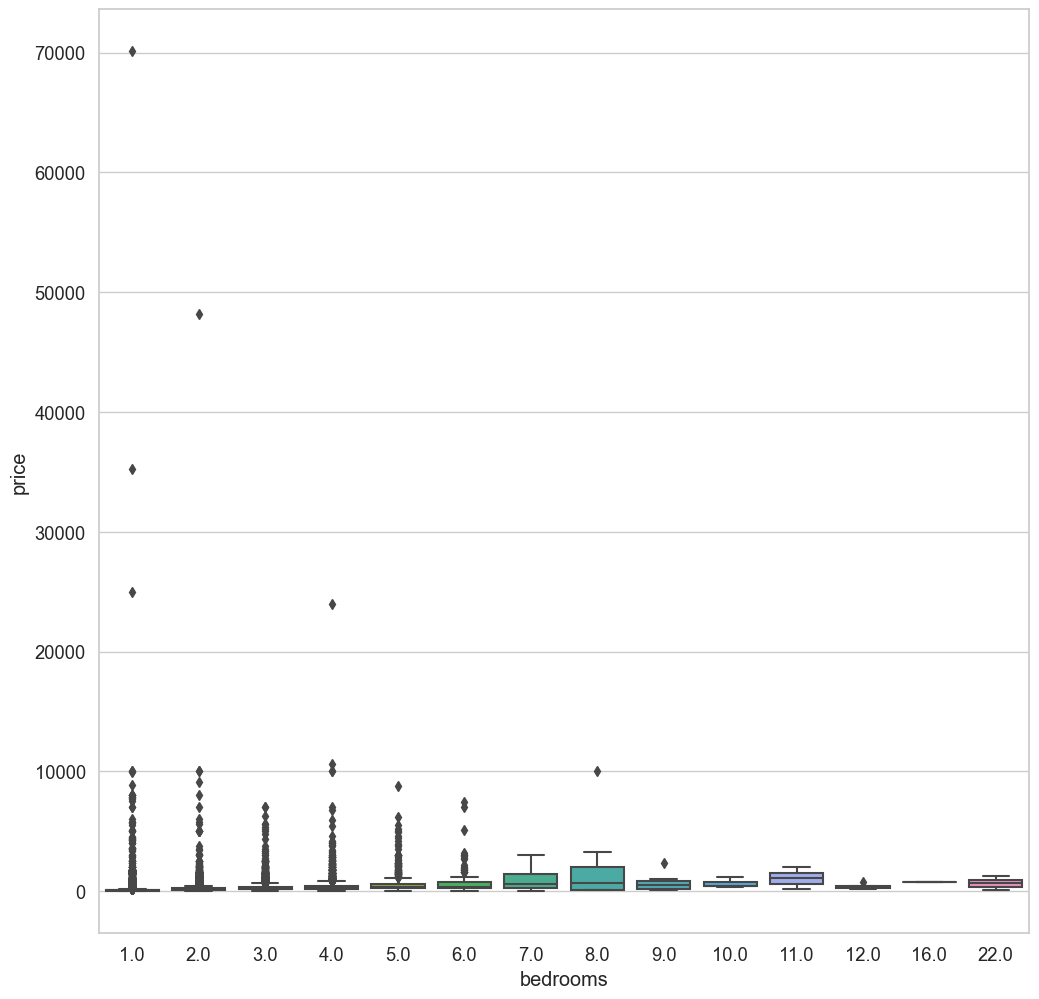

In [53]:
# Plotting a boxplot to quickly see if there is any trend between price and no. bedrooms
plt.figure(figsize=(12,12))
sns.boxplot(x='bedrooms', y='price', data=london[['bedrooms', 'price']])

>> The plot is not legible; we will create another one focusing on price locations under $10,000.

<AxesSubplot:xlabel='bedrooms', ylabel='price'>

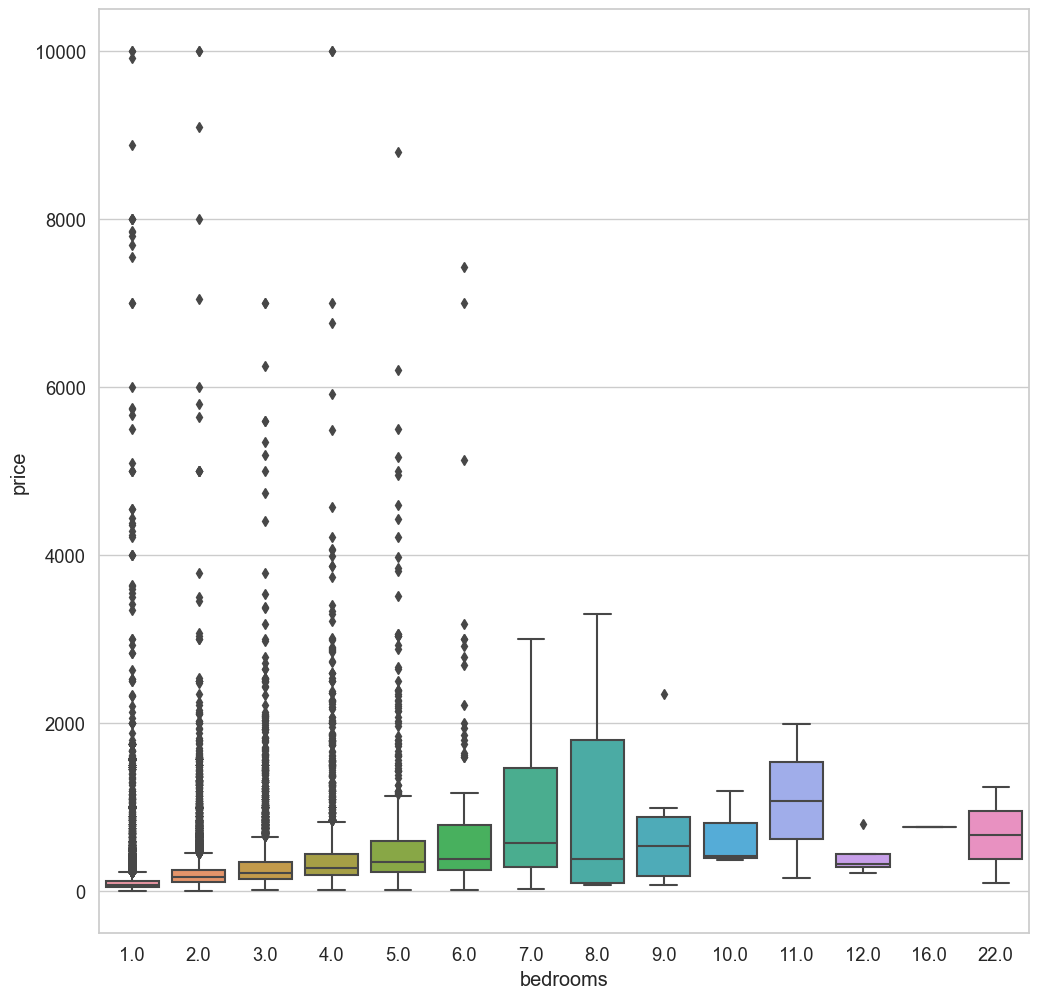

In [54]:
london_10000= london[london['price'] <= 10000]

plt.figure(figsize=(12,12))
sns.boxplot(x='bedrooms', y='price', data=london_10000[['bedrooms', 'price']])

>> We can observe that there is a correlation between the price and the number of bedrooms.
> There are numerous listings with 1 to 6 bedrooms. However, the count of listings significantly decreases for properties with more than 6 bedrooms.

In [55]:
london_10000.loc[london_10000['bedrooms'] == 22]

host_id       host_name  host_since  \
18442   36262172  Titti And Orla  2015-06-20   
39583  483585628             Ali  2022-10-14   

                                                    name  \
18442  WOWspace-(max16 per house)combination of 3 houses   
39583                                  SK Heathrow Hotel   

                                             description  host_response_time  \
18442  Think of your ideal home & you've pretty much ...  within a few hours   
39583  Ideal Location closed to Heathrow Airport perf...        within a day   

      host_response_rate host_acceptance_rate  longitude   latitude  \
18442               100%                  88%  -0.089960  51.593850   
39583               100%                    0  -0.430528  51.496009   

                                   neighborhood_overview  \
18442  The borough of Haringey is a vibrant and multi...   
39583                                                  0   

      neighbourhood_cleansed                      property_type  \
18442               Haringey                        Entire home   
39583             Hillingdon  Private room in bed and breakfast   

             room_type  accommodates  bedrooms  beds  \
18442  Entire home/apt            16      22.0  16.0   
39583     Private room             2      22.0   1.0   

                                               amenities  price  \
18442  ["Dining table", "Washer", "Outdoor furniture"...   1247   
39583  ["First aid kit", "Air conditioning", "Fire ex...    100   

       minimum_nights  maximum_nights  minimum_nights_avg_ntm  \
18442               1            1125                     1.3   
39583               1              28                     1.0   

       maximum_nights_avg_ntm  reviews_per_month  number_of_reviews  \
18442                  1125.0               0.52                 37   
39583                    28.0               0.00                  0   

       number_of_reviews_ltm  number_of_reviews_l30d  review_scores_rating  \
18442                      6                       0                  4.81   
39583                      0                       0                  0.00   

      instant_bookable range_price  
18442                f   1000-2000  
39583                f      50-100

In [56]:
london_10000.loc[39583, 'bedrooms'] = 2

In [57]:
london_10000.loc[london_10000['bedrooms'] == 16]

host_id  host_name  host_since  \
44821  4813934  Kimberley  2013-01-23   

                                                    name  \
44821  The Norfolk Escape - 16BDR in 4 Bright Mews Homes   

                                             description  host_response_time  \
44821  These modern and sizeable homes are located in...  within a few hours   

      host_response_rate host_acceptance_rate  longitude  latitude  \
44821                98%                  59%   -0.17458   51.5161   

                                   neighborhood_overview  \
44821  Right in the heart of London only moments away...   

      neighbourhood_cleansed property_type        room_type  accommodates  \
44821            Westminster   Entire home  Entire home/apt            16   

       bedrooms  beds                                          amenities  \
44821      16.0  16.0  ["Washer", "Hangers", "Dishwasher", "Bed linen...   

       price  minimum_nights  maximum_nights  minimum_nights_avg_ntm  \
44821    765               1            1125                     2.3   

       maximum_nights_avg_ntm  reviews_per_month  number_of_reviews  \
44821                  1125.0               0.15                 11   

       number_of_reviews_ltm  number_of_reviews_l30d  review_scores_rating  \
44821                      0                       0                  4.45   

      instant_bookable range_price  
44821                f     600-800

In [58]:
# Creating a number of rooms vs property type dataframe

# new london 2 = listings under $10000 and top 15 property type

new_london2 = london_10000[london_10000['property_type'].isin(top_property_types)]
bedroom_property = new_london2[['property_type', 'bedrooms']]
bedroom_property.head(n=15)

property_type  bedrooms
0               Private room in condo       1.0
1                  Entire rental unit       1.0
2                  Entire rental unit       2.0
3         Private room in rental unit       1.0
4                        Entire condo       1.0
5         Private room in rental unit       1.0
6                         Entire home       3.0
7   Private room in bed and breakfast       1.0
8   Private room in bed and breakfast       1.0
9         Private room in rental unit       1.0
10               Private room in home       2.0
12               Private room in home       1.0
13                        Entire home       2.0
14                 Entire rental unit       1.0
15               Private room in home       1.0

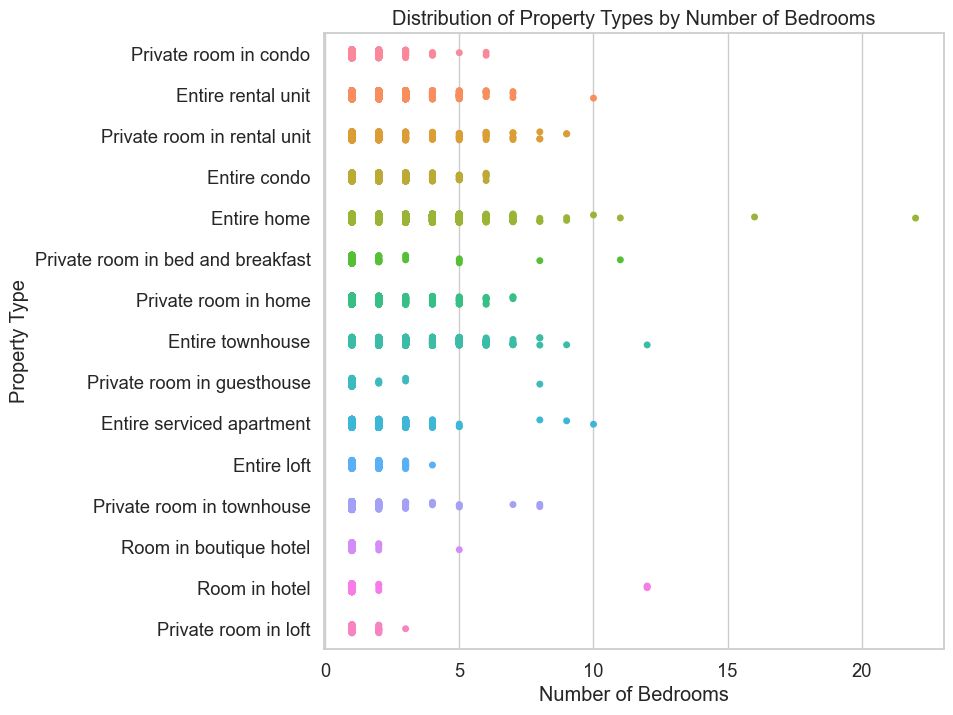

In [59]:
# Plotting a strip plot to visually see the number of listings for each room_type and the nunmber of bedrooms

plt.figure(figsize=(8, 8))
sns.stripplot(x='bedrooms', y='property_type', data=bedroom_property)

# Add labels and title
plt.xlabel('Number of Bedrooms')
plt.ylabel('Property Type')
plt.title('Distribution of Property Types by Number of Bedrooms')

# Display the plot
plt.show()

>> The strip plot clearly illustrates a decreasing trend in the number of listings as the number of bedrooms increases. Additionally, we observe that properties categorized as entire rental units, entire homes, and entire townhouses are the only ones with more than 10 bedrooms. 

<AxesSubplot:xlabel='bedrooms', ylabel='property_type'>

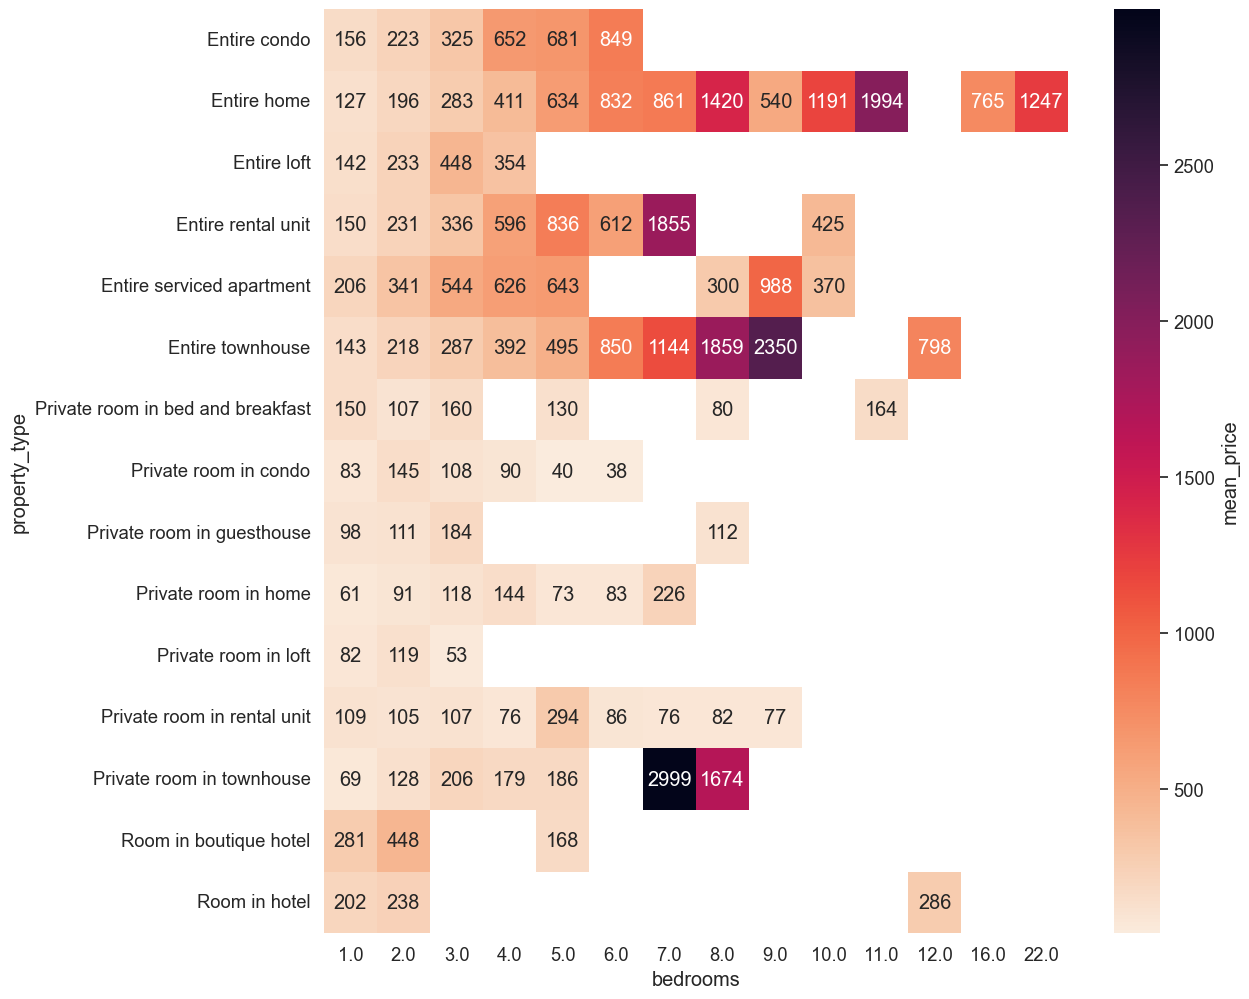

In [60]:
# Plotting a heatmap of prices with number of bedrooms for listings

plt.figure(figsize=(12,12))
sns.heatmap(new_london2.groupby(['property_type', 'bedrooms']).price.mean().unstack(),annot=True, fmt=".0f", cmap = sns.cm.rocket_r, cbar_kws={'label': 'mean_price'})

>> The heatmap clearly shows that the price of listings increases with the number of bedrooms. However, there may be some anomalies present, as certain property types exhibit higher prices without necessarily having the maximum number of bedrooms.

In [61]:
# Number of bedrooms
print("Number of bedrooms :", len(new_london2["bedrooms"].unique()))
print()
print("BedRms|Listings")
# Number of listings of each room type
print(new_london2["bedrooms"].value_counts())

Number of bedrooms : 14

BedRms|Listings
1.0     44898
2.0     15565
3.0      5289
4.0      2052
5.0       622
6.0       150
7.0        44
8.0        15
9.0         6
12.0        4
10.0        3
11.0        2
22.0        1
16.0        1
Name: bedrooms, dtype: int64


<br> 
​
<div class="alert alert-info"><b>FISRT CONCLUSIONS</b> 
    
1 - The majority of listings in London are divided between "Entire home/apt" and "Private room" categories, with a significantly higher number of "Entire rental unit" listings compared to other property types.

2 - Price variation is influenced by both the room type and the property type. The highest mean prices are observed for entire homes.

3 - A clear correlation between price and the number of bedrooms exists, as the price of listings increases with the number of bedrooms.
 
​

# NEIGHBOURHOOD

## Price by neighbourhood by property type

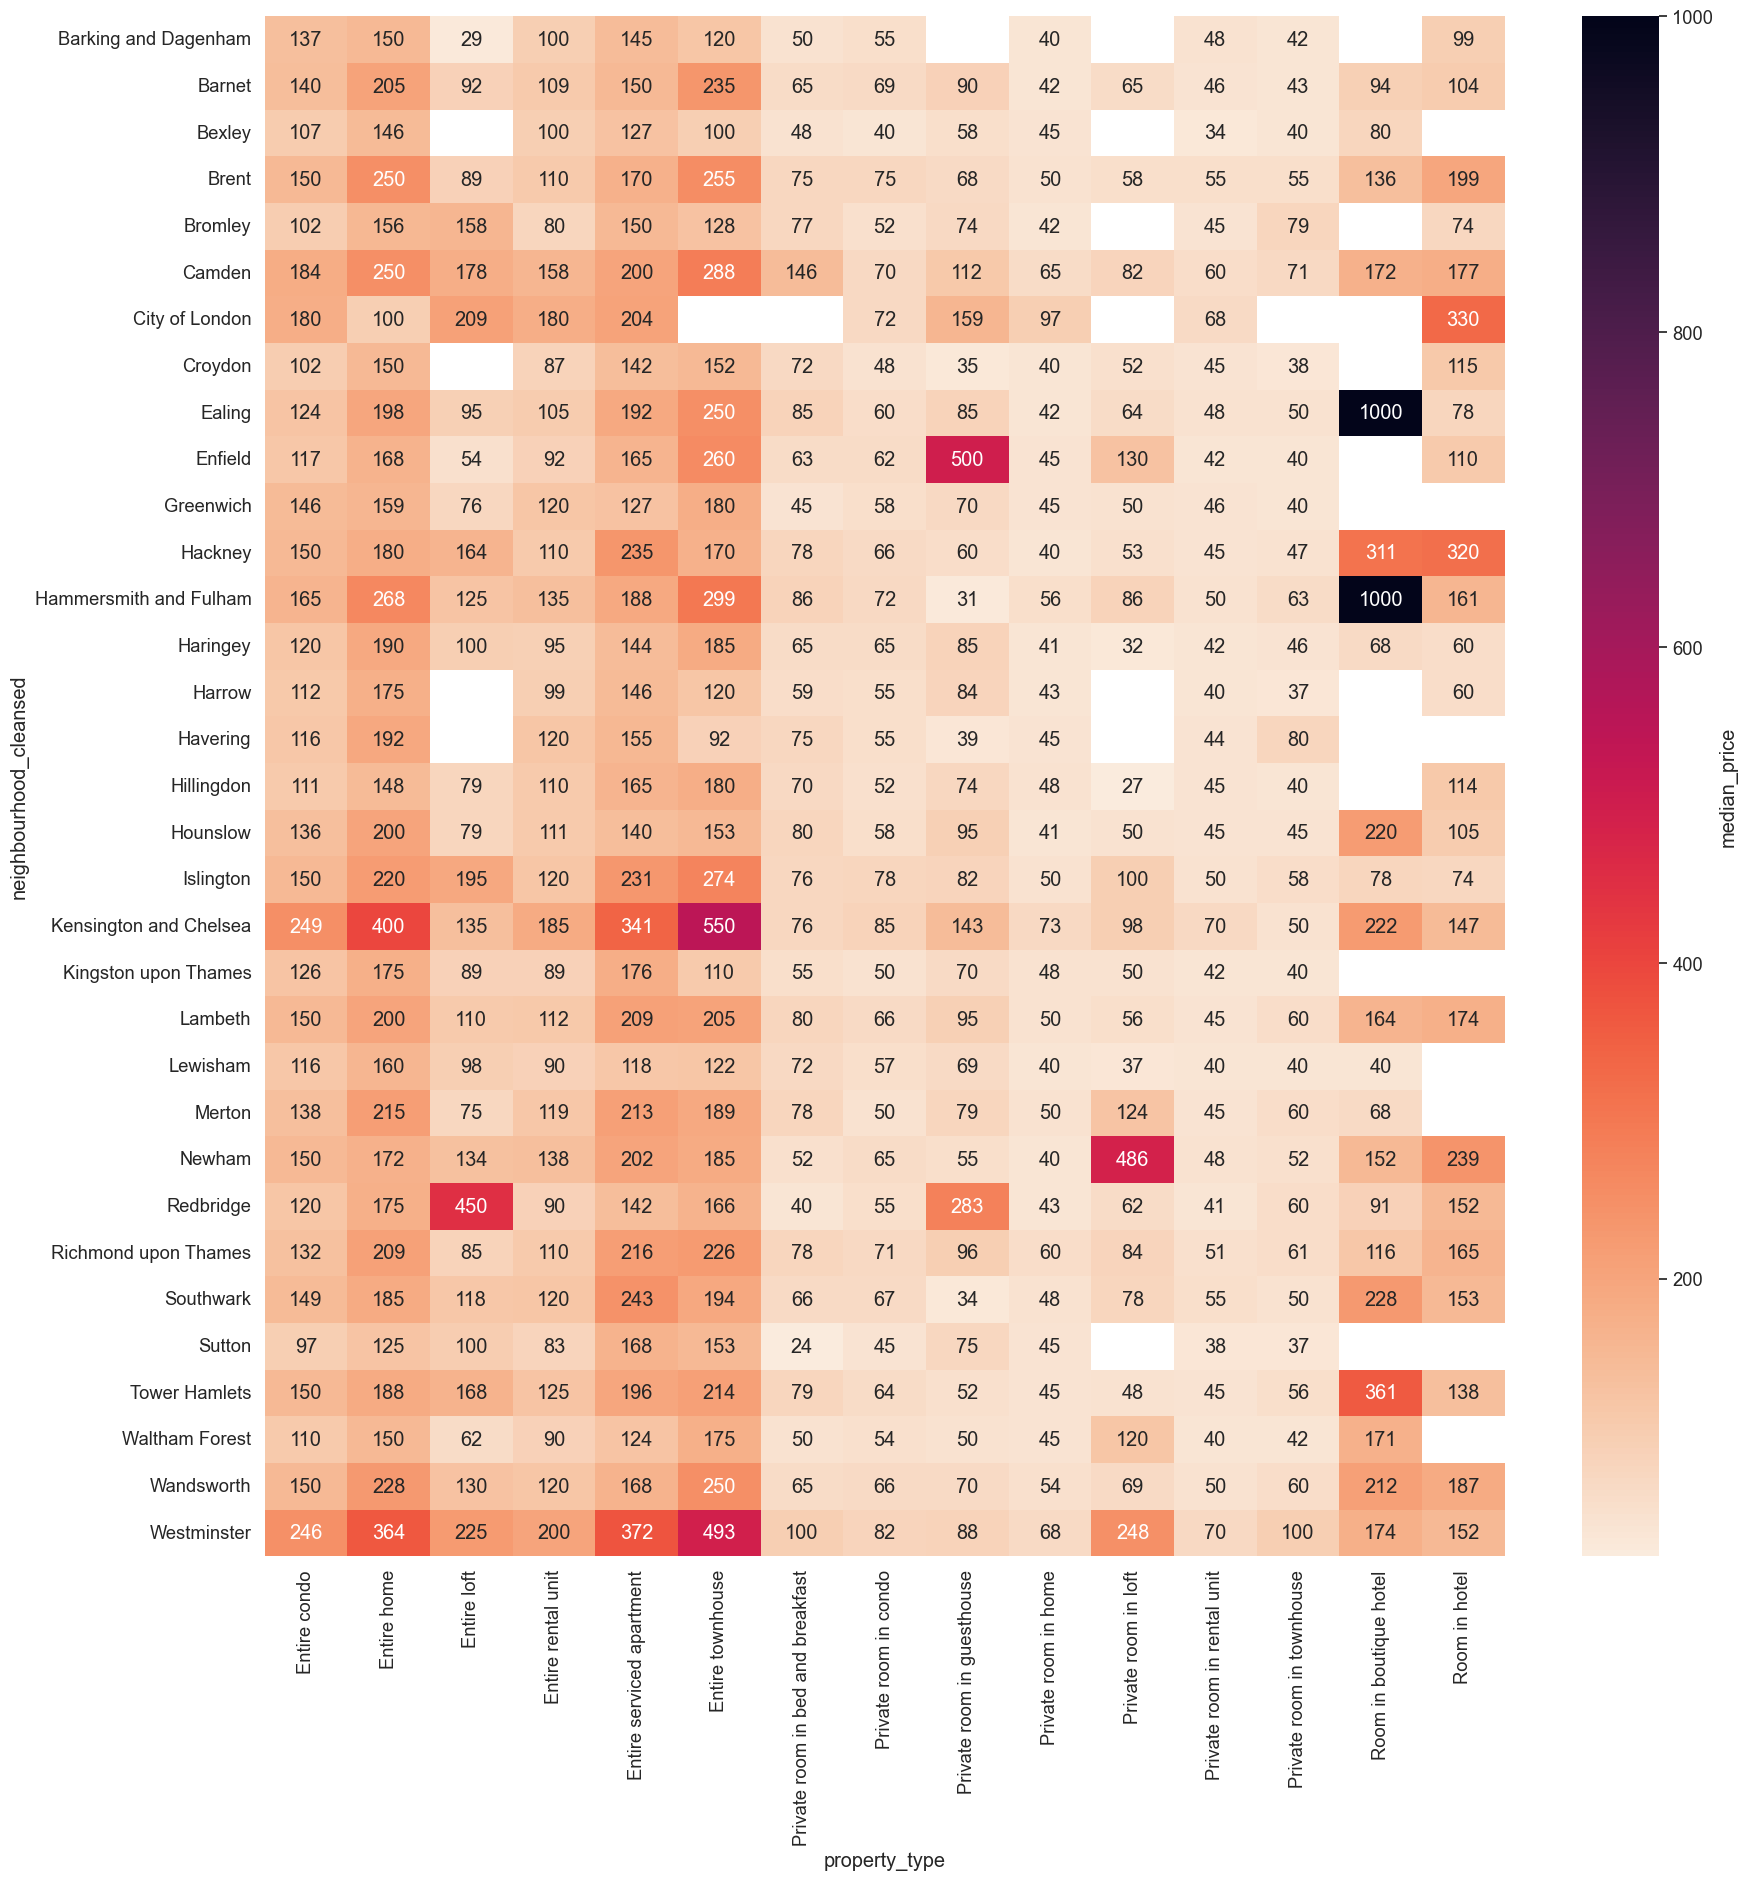

In [62]:
# Plotting a heatmap of the neighbourhoods vs property type with the median price

plt.figure(figsize=(20,20))
sns.heatmap(new_london2.groupby([
        'neighbourhood_cleansed', 'property_type']).price.median().unstack(),annot=True, fmt=".0f", cmap = sns.cm.rocket_r, cbar_kws={'label': 'median_price'});

> 1 - Above the heatmap, we can observe that all property types are present in all neighborhoods.

> 2 - Additionally, some neighborhood rows, such as Westminster, Kensington and Chelsea, and Hammersmith and Fulham, appear darker than others, indicating higher prices in these areas.

> 3 - Finally, we notice that the columns also show variations in darkness based on the property type. The darkest columns correspond to 'entire townhouse', 'entire serviced apartment', and 'home', suggesting that these property types have the highest prices.

>> These conclusions indicate that Airbnb hosts in London offer diverse properties in various neighborhoods, with certain areas and property types being associated with higher listing prices. Understanding such patterns can help travelers make informed decisions when choosing their accommodations, while also providing insights to hosts regarding pricing strategies based on property type and location.

## Number of listings by neighbourhoods

In [63]:
# Grouping neighbourhood by number of listings and then cleaning them

neighbourhood_df = new_london2.groupby('neighbourhood_cleansed').price.count()
neighbourhood_df = neighbourhood_df.reset_index()
neighbourhood_df = neighbourhood_df.rename(columns={'price': 'Number_Of_Listings'})
neighbourhood_df = neighbourhood_df.sort_values('Number_Of_Listings', ascending=False)
neighbourhood_df.head()

neighbourhood_cleansed  Number_Of_Listings
32             Westminster                7642
29           Tower Hamlets                5644
11                 Hackney                5130
5                   Camden                4476
19  Kensington and Chelsea                4300

In [64]:
# Grouping neighbourhood by average price of listings and cleaning them

neighbourhood_price_df=new_london2.groupby('neighbourhood_cleansed').price.median()
neighbourhood_price_df=neighbourhood_price_df.reset_index()
neighbourhood_price_df=neighbourhood_price_df.rename(columns={'price':'Median_Price'})
neighbourhood_price_df=neighbourhood_price_df.sort_values('Median_Price',ascending=[0])
neighbourhood_price_df.head()

neighbourhood_cleansed  Median_Price
32             Westminster         190.0
19  Kensington and Chelsea         190.0
6           City of London         179.0
5                   Camden         135.0
12  Hammersmith and Fulham         120.0

In [65]:
# Merging the two dataframes

merge_df=pd.merge(neighbourhood_df,neighbourhood_price_df,on='neighbourhood_cleansed')
merge_df.head()

neighbourhood_cleansed  Number_Of_Listings  Median_Price
0             Westminster                7642         190.0
1           Tower Hamlets                5644          90.0
2                 Hackney                5130          90.0
3                  Camden                4476         135.0
4  Kensington and Chelsea                4300         190.0

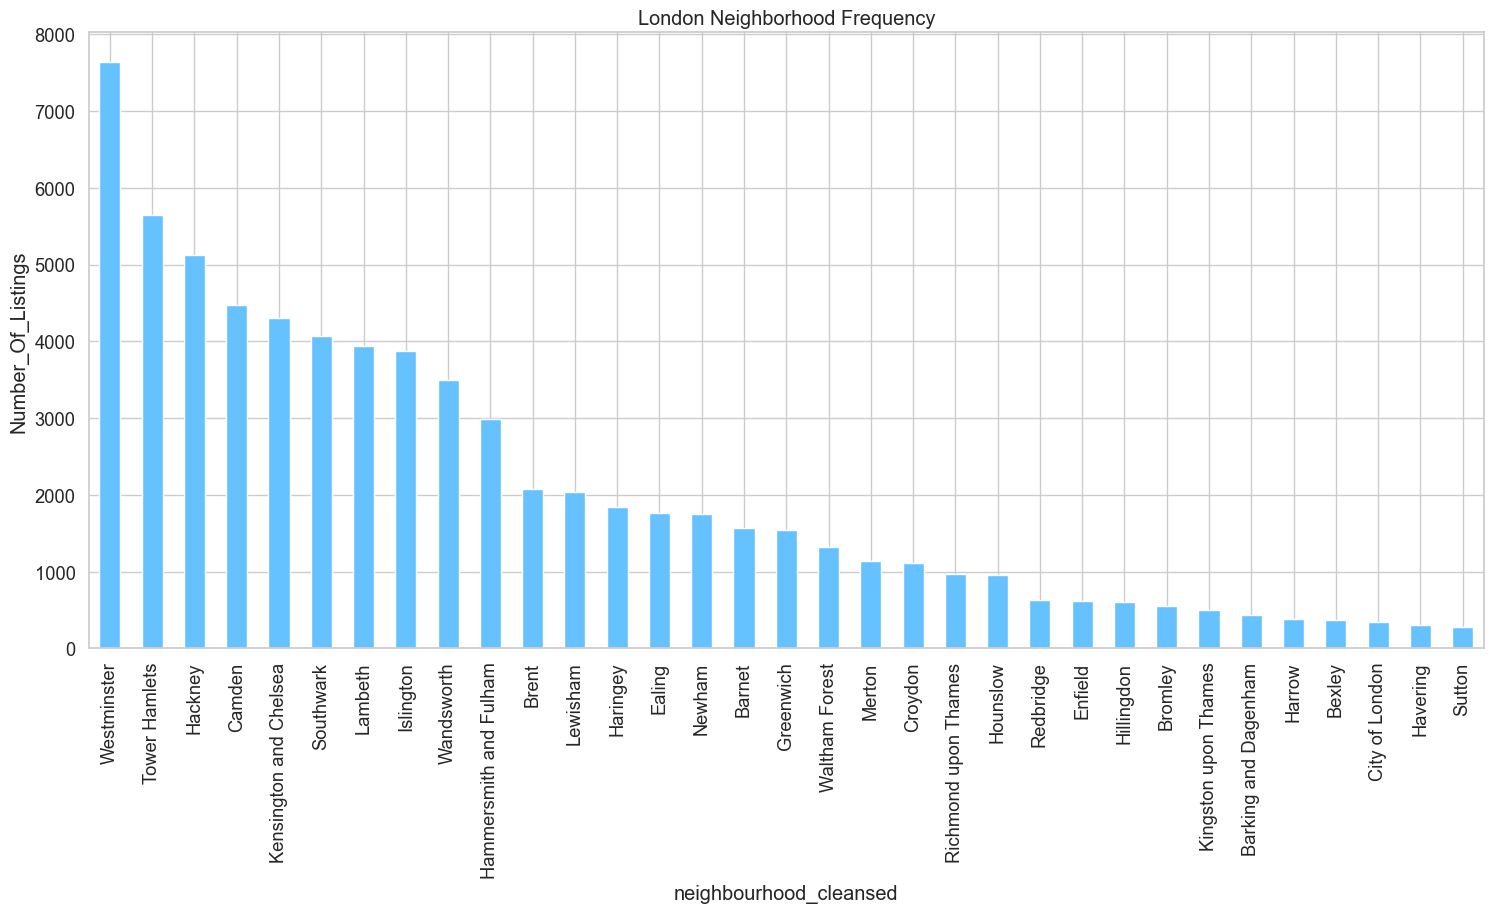

In [66]:
# Visualizing the number of listings for each neighbourhood
#matplotlib.style.use('ggplot')

objects = neighbourhood_df['neighbourhood_cleansed']
y_pos = neighbourhood_df['Number_Of_Listings']

neighbourhood_df.plot(kind='bar', 
           x='neighbourhood_cleansed',
           y='Number_Of_Listings',
           color = '#66c2ff', 
           figsize =(18,8), 
           title = 'London Neighborhood Frequency', 
           legend = False)

plt.ylabel('Number_Of_Listings');

>> We can observe that the neighborhoods with the highest number of listings are Westminster, Tower Hamlets, Hackney, and Camden. We will continue our analysis to determine if the neighborhood has an impact on the price.

Text(0, 0.5, 'Median Price')

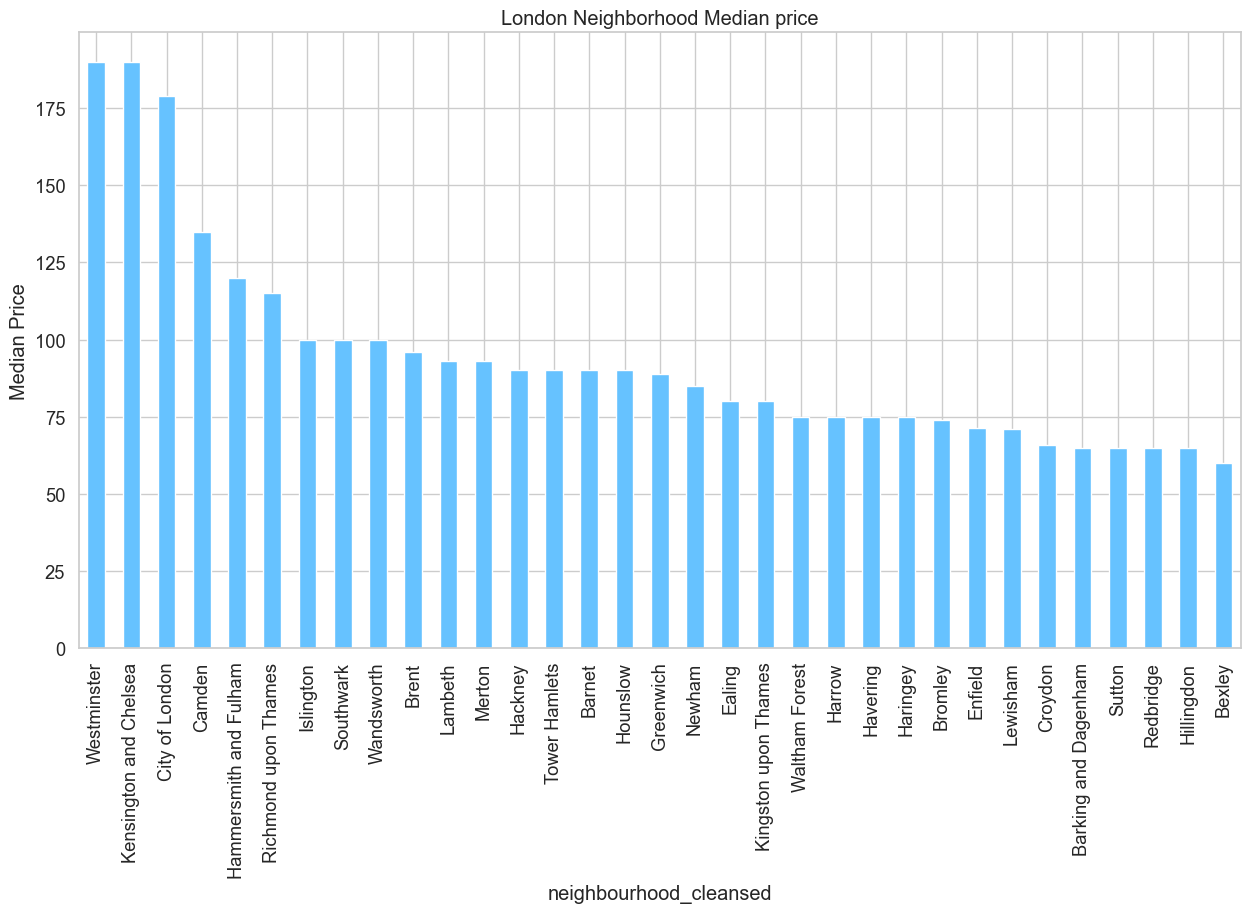

In [67]:
objects = neighbourhood_df['neighbourhood_cleansed']
y_pos = neighbourhood_price_df['Median_Price']

neighbourhood_price_df.plot(kind='bar', 
           x='neighbourhood_cleansed',
           y='Median_Price',
           color = '#66c2ff', 
           figsize =(15,8), 
           title = 'London Neighborhood Median price', 
           legend = False)

plt.ylabel('Median Price')

In [68]:
merge_df[merge_df['neighbourhood_cleansed'].isin(['Westminster', 'Kensington and Chelsea', 'City of London'])]

neighbourhood_cleansed  Number_Of_Listings  Median_Price
0              Westminster                7642         190.0
4   Kensington and Chelsea                4300         190.0
30          City of London                 350         179.0

> 1 - There is a positive correlation between higher prices and the number of listings in certain neighborhoods, such as Westminster and Camden. This suggests that these areas are both desirable and in demand for Airbnb accommodations.

> 2 - Westminster, Kensington and Chelsea, and City of London are distinguished by significantly higher prices compared to other neighborhoods in the dataset. These areas might offer more upscale or luxurious options for Airbnb travelers.

> 3 - City of London, despite having higher prices, has fewer listings than Westminster and Kensington and Chelsea. This could imply that the City of London has a more exclusive or limited Airbnb market, making it an attractive choice for travelers seeking premium accommodations in a more exclusive setting.

>> In summary, London's Airbnb market exhibits a variation in prices and demand across different neighborhoods, with some areas offering higher-priced options and higher demand, while others provide more exclusive and luxurious options despite having fewer listings. Understanding these patterns can help both hosts and travelers make informed decisions when engaging in the Airbnb market in London.

## Availability by neighborhoods

In [69]:
# Group the data by 'neighbourhood_cleansed'
neighborhood_group = new_london2.groupby('neighbourhood_cleansed')

# Calculate the total number of listings in each neighborhood
total_listings = neighborhood_group.size()

# Calculate the average minimum nights in each neighborhood
average_min_nights = neighborhood_group['minimum_nights'].mean()

# Calculate the average maximum nights in each neighborhood
average_max_nights = neighborhood_group['maximum_nights'].mean()


# Create a new DataFrame to store the results
availability_df = pd.DataFrame({
    'Total_Listings': total_listings,
    'Average_Minimum_Nights': average_min_nights,
    'Average_Maximum_Nights': average_max_nights
})

# Sort the DataFrame by total listings in descending order
availability_df = availability_df.sort_values(by='Total_Listings', ascending=False)

availability_df

Total_Listings  Average_Minimum_Nights  \
neighbourhood_cleansed                                           
Westminster                       7642                6.555875   
Tower Hamlets                     5644                7.707831   
Hackney                           5130                5.425926   
Camden                            4476                5.855004   
Kensington and Chelsea            4300                6.771163   
Southwark                         4063                5.190254   
Lambeth                           3933                4.734045   
Islington                         3870                5.059948   
Wandsworth                        3490                5.142120   
Hammersmith and Fulham            2990                5.744816   
Brent                             2080                5.901442   
Lewisham                          2039                4.514958   
Haringey                          1848                5.319264   
Ealing                            1757                4.775754   
Newham                            1749                5.121212   
Barnet                            1572                6.862595   
Greenwich                         1541                8.169371   
Waltham Forest                    1323                5.271353   
Merton                            1141                3.828221   
Croydon                           1114                5.453321   
Richmond upon Thames               974                6.778234   
Hounslow                           955                4.251309   
Redbridge                          625                4.748800   
Enfield                            618                5.127832   
Hillingdon                         606                4.879538   
Bromley                            550                4.067273   
Kingston upon Thames               506                3.930830   
Barking and Dagenham               437                4.929062   
Harrow                             378                5.119048   
Bexley                             371                4.407008   
City of London                     350                5.691429   
Havering                           303                5.132013   
Sutton                             277                3.194946   

                        Average_Maximum_Nights  
neighbourhood_cleansed                          
Westminster                         572.487830  
Tower Hamlets                       592.082034  
Hackney                             565.119688  
Camden                              570.968945  
Kensington and Chelsea              597.958605  
Southwark                          2774.913118  
Lambeth                             542.638444  
Islington                           577.348062  
Wandsworth                          546.336103  
Hammersmith and Fulham              560.969900  
Brent                               525.674038  
Lewisham                           5420.441883  
Haringey                            527.064935  
Ealing                              528.304496  
Newham                              527.627216  
Barnet                              529.716285  
Greenwich                           551.305646  
Waltham Forest                      499.682540  
Merton                           460531.370727  
Croydon                             522.370736  
Richmond upon Thames                562.369610  
Hounslow                            563.871204  
Redbridge                           511.305600  
Enfield                             554.966019  
Hillingdon                          581.635314  
Bromley                             456.936364  
Kingston upon Thames                532.045455  
Barking and Dagenham                589.196796  
Harrow                              649.452381  
Bexley                              546.943396  
City of London                      694.988571  
Havering                            491.478548  
Sutton                              537.729242

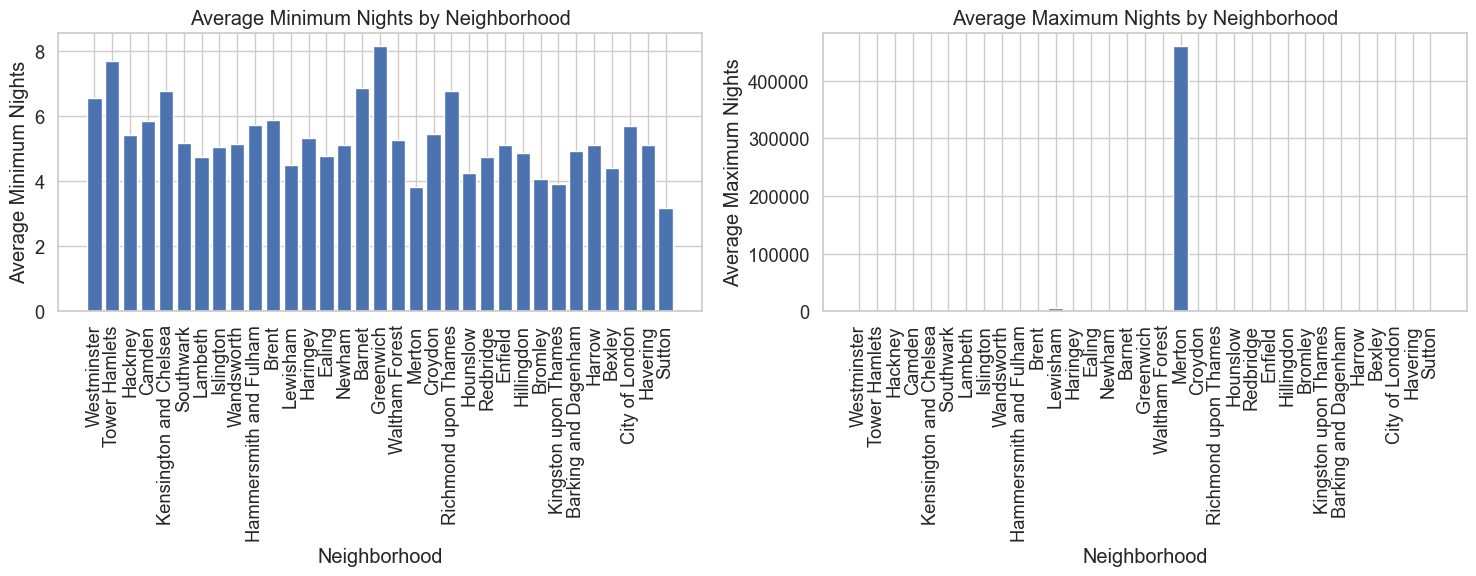

In [70]:
# Create two separate bar charts side by side
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

# Plot the average minimum nights on the first subplot
axes[0].bar(availability_df.index, availability_df['Average_Minimum_Nights'])
axes[0].set_xticklabels(availability_df.index, rotation=90)
axes[0].set_xlabel('Neighborhood')
axes[0].set_ylabel('Average Minimum Nights')
axes[0].set_title('Average Minimum Nights by Neighborhood')

# Plot the average maximum nights on the second subplot
axes[1].bar(availability_df.index, availability_df['Average_Maximum_Nights'])
axes[1].set_xticklabels(availability_df.index, rotation=90)
axes[1].set_xlabel('Neighborhood')
axes[1].set_ylabel('Average Maximum Nights')
axes[1].set_title('Average Maximum Nights by Neighborhood')

plt.tight_layout()
plt.show()

In [71]:
new_london2[new_london2['neighbourhood_cleansed'] == 'Merton'].head()

host_id  host_name  host_since  \
3      187811      Nikki  2010-08-01   
5   500808473  Ekaterina  2023-02-12   
32  120187440       Leon  2017-03-11   
82     381894       Eddy  2011-02-08   
96  156936361       Colm  2017-10-31   

                                            name  \
3               Wimbledon Double Bedroom Ensuite   
5                    Cosy room with own bathroom   
32        Eveline house  Spacious room available   
82  1 bed apartment (A), wi-fi, sleeps 4, london   
96                                  private room   

                                          description  host_response_time  \
3   A welcoming and stylish 2 bedroom 2 bathroom f...                   0   
5                                       Spacious room      within an hour   
32  Large spacious room in nice house close to all...  a few days or more   
82  Situated off  high Street Collers wood Wimbled...  within a few hours   
96                              all new decor  bright      within an hour   

   host_response_rate host_acceptance_rate  longitude   latitude  \
3                   0                 100%  -0.188410  51.422310   
5                100%                 100%  -0.174299  51.416047   
32                 0%                 100%  -0.163144  51.409796   
82                92%                  58%  -0.180070  51.423140   
96               100%                 100%  -0.137920  51.410370   

                                neighborhood_overview neighbourhood_cleansed  \
3                                                   0                 Merton   
5                                                   0                 Merton   
32                                                  0                 Merton   
82  Colliers Wood   is a great cost effective base...                 Merton   
96                                                  0                 Merton   

                  property_type        room_type  accommodates  bedrooms  \
3   Private room in rental unit     Private room             1       1.0   
5   Private room in rental unit     Private room             2       1.0   
32         Private room in home     Private room             1       1.0   
82           Entire rental unit  Entire home/apt             4       1.0   
96         Private room in home     Private room             1       1.0   

    beds                                          amenities  price  \
3    1.0  ["Washer", "Iron", "Hangers", "Kitchen", "Smok...    100   
5    1.0  ["Washer", "First aid kit", "Fire extinguisher...     43   
32   1.0  ["Washer", "Fire extinguisher", "Smoke alarm",...     52   
82   2.0  ["Dining table", "Washer", "Hangers", "Bed lin...    104   
96   1.0  ["Hangers", "Shampoo", "Kitchen", "TV", "Dedic...     35   

    minimum_nights  maximum_nights  minimum_nights_avg_ntm  \
3                5            1125                     5.0   
5                1             365                     1.0   
32               1             365                     1.0   
82               4            1125                     4.0   
96               3            1125                     3.0   

    maximum_nights_avg_ntm  reviews_per_month  number_of_reviews  \
3                   1125.0               0.05                  4   
5                    365.0               3.00                  3   
32                   365.0               0.00                  0   
82                  1125.0               0.07                  4   
96                  1125.0               0.22                  2   

    number_of_reviews_ltm  number_of_reviews_l30d  review_scores_rating  \
3                       0                       0                  3.67   
5                       3                       3                  4.67   
32                      0                       0                  0.00   
82                      1                       0                  3.25   
96                      2                       0               

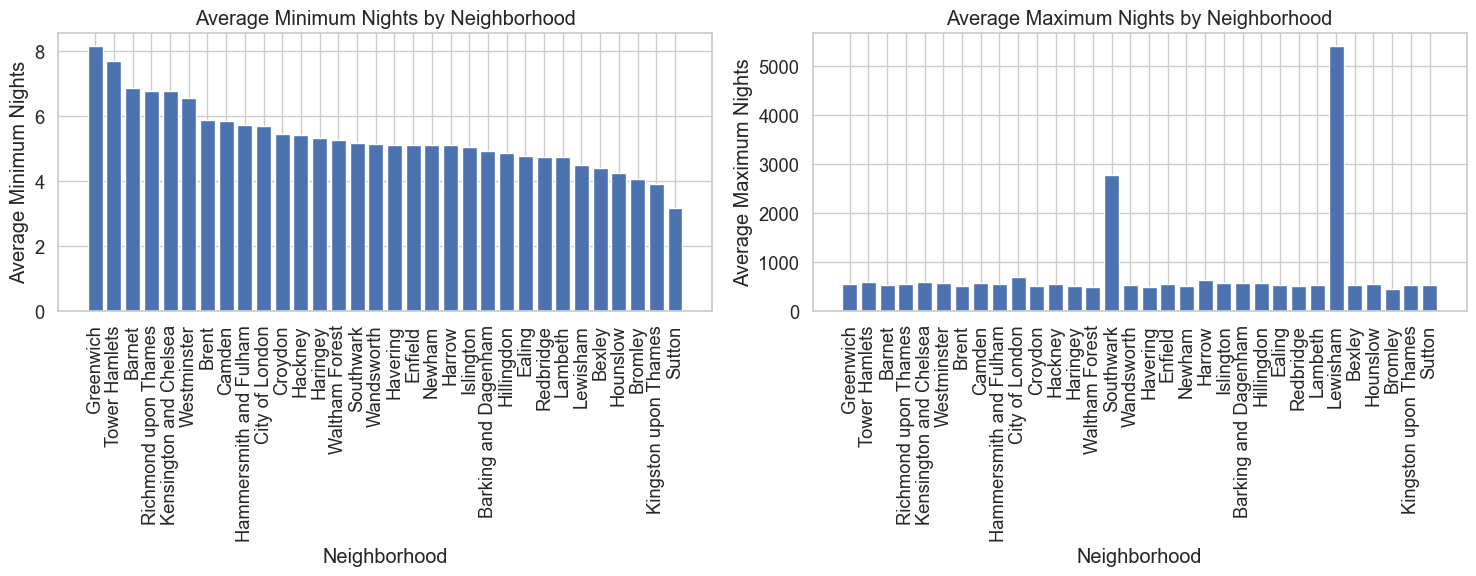

In [72]:
availability_df_Wo_Merton = availability_df[availability_df.index != 'Merton']

# Sort the DataFrame by average minimum nights in descending order
availability_df_Wo_Merton = availability_df_Wo_Merton.sort_values(by='Average_Minimum_Nights', ascending=False)

# Create two separate bar charts side by side
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

# Plot the average minimum nights on the first subplot
axes[0].bar(availability_df_Wo_Merton.index, availability_df_Wo_Merton['Average_Minimum_Nights'])
axes[0].set_xticklabels(availability_df_Wo_Merton.index, rotation=90)
axes[0].set_xlabel('Neighborhood')
axes[0].set_ylabel('Average Minimum Nights')
axes[0].set_title('Average Minimum Nights by Neighborhood')

# Plot the average maximum nights on the second subplot
axes[1].bar(availability_df_Wo_Merton.index, availability_df_Wo_Merton['Average_Maximum_Nights'])
axes[1].set_xticklabels(availability_df_Wo_Merton.index, rotation=90)
axes[1].set_xlabel('Neighborhood')
axes[1].set_ylabel('Average Maximum Nights')
axes[1].set_title('Average Maximum Nights by Neighborhood')

plt.tight_layout()
plt.show()

> 1 - Neighborhoods with higher average minimum nights tend to be areas with popular tourist attractions or places that offer longer-term stays. Westminster, Tower Hamlets, and Hackney have relatively high average minimum nights, indicating that visitors might prefer to stay longer in these neighborhoods.

> 2 - Neighborhoods like Southwark and Lewisham have exceptionally high average maximum nights, which might suggest that they offer more extended rental opportunities or are more accommodating to long-term stays.

> 3 - On the other hand, the neighborhood of Merton has an extremely high average maximum nights value, far higher than any other neighborhood. This could be due to certain properties with very long maximum stay policies, but it also stands out as an outlier compared to other neighborhoods.

>> Overall, these metrics provide insights into the potential popularity and rental characteristics of different neighborhoods in London, which could be valuable for both hosts and travelers in understanding rental trends and planning their stays accordingly.

In [73]:
# Filter out the 'Merton', 'Southwark', and 'Lewisham' neighborhoods
london_wo_cities = new_london2[~new_london2['neighbourhood_cleansed'].isin(['Merton', 'Lewisham', 'Southwark'])]

In [74]:
# Group the data by 'neighbourhood_cleansed' and 'property_type'
grouped_data = london_wo_cities.groupby(['neighbourhood_cleansed', 'property_type'])

# Calculate availability metrics for each combination of neighborhood and property type
availability_metrics = grouped_data.agg({
    'name': 'count',                     # Total number of listings
    'minimum_nights': 'mean',            # Average minimum nights
    'maximum_nights': 'mean',            # Average maximum nights
    # Add more metrics as needed based on your analysis (e.g., average price, average reviews, etc.)
})

# Rename the columns for clarity
availability_metrics = availability_metrics.rename(columns={
    'name': 'Total_Listings',
    'minimum_nights': 'Average_Minimum_Nights',
    'maximum_nights': 'Average_Maximum_Nights'
})

# Sort the DataFrame by total listings in descending order
availability_metrics = availability_metrics.sort_values(by='Total_Listings', ascending=False)

availability_metrics


Total_Listings  \
neighbourhood_cleansed property_type                            
Westminster            Entire rental unit                3843   
Kensington and Chelsea Entire rental unit                2282   
Camden                 Entire rental unit                1988   
Tower Hamlets          Entire rental unit                1975   
Hackney                Entire rental unit                1882   
...                                                       ...   
Brent                  Room in boutique hotel               1   
Bromley                Entire loft                          1   
Haringey               Room in boutique hotel               1   
Sutton                 Entire townhouse                     1   
Newham                 Private room in loft                 1   

                                               Average_Minimum_Nights  \
neighbourhood_cleansed property_type                                    
Westminster            Entire rental unit                    7.349727   
Kensington and Chelsea Entire rental unit                    6.640228   
Camden                 Entire rental unit                    6.802314   
Tower Hamlets          Entire rental unit                    7.324051   
Hackney                Entire rental unit                    5.791180   
...                                                               ...   
Brent                  Room in boutique hotel                1.000000   
Bromley                Entire loft                           2.000000   
Haringey               Room in boutique hotel                2.000000   
Sutton                 Entire townhouse                      5.000000   
Newham                 Private room in loft                  1.000000   

                                               Average_Maximum_Nights  
neighbourhood_cleansed property_type                                   
Westminster            Entire rental unit                  611.321884  
Kensington and Chelsea Entire rental unit                  638.578002  
Camden                 Entire rental unit                  599.092555  
Tower Hamlets          Entire rental unit                  635.303797  
Hackney                Entire rental unit                  616.046227  
...                                                               ...  
Brent                  Room in boutique hotel              365.000000  
Bromley                Entire loft                        1125.000000  
Haringey               Room in boutique hotel               10.000000  
Sutton                 Entire townhouse                     30.000000  
Newham                 Private room in loft                 60.000000  

[418 rows x 3 columns]

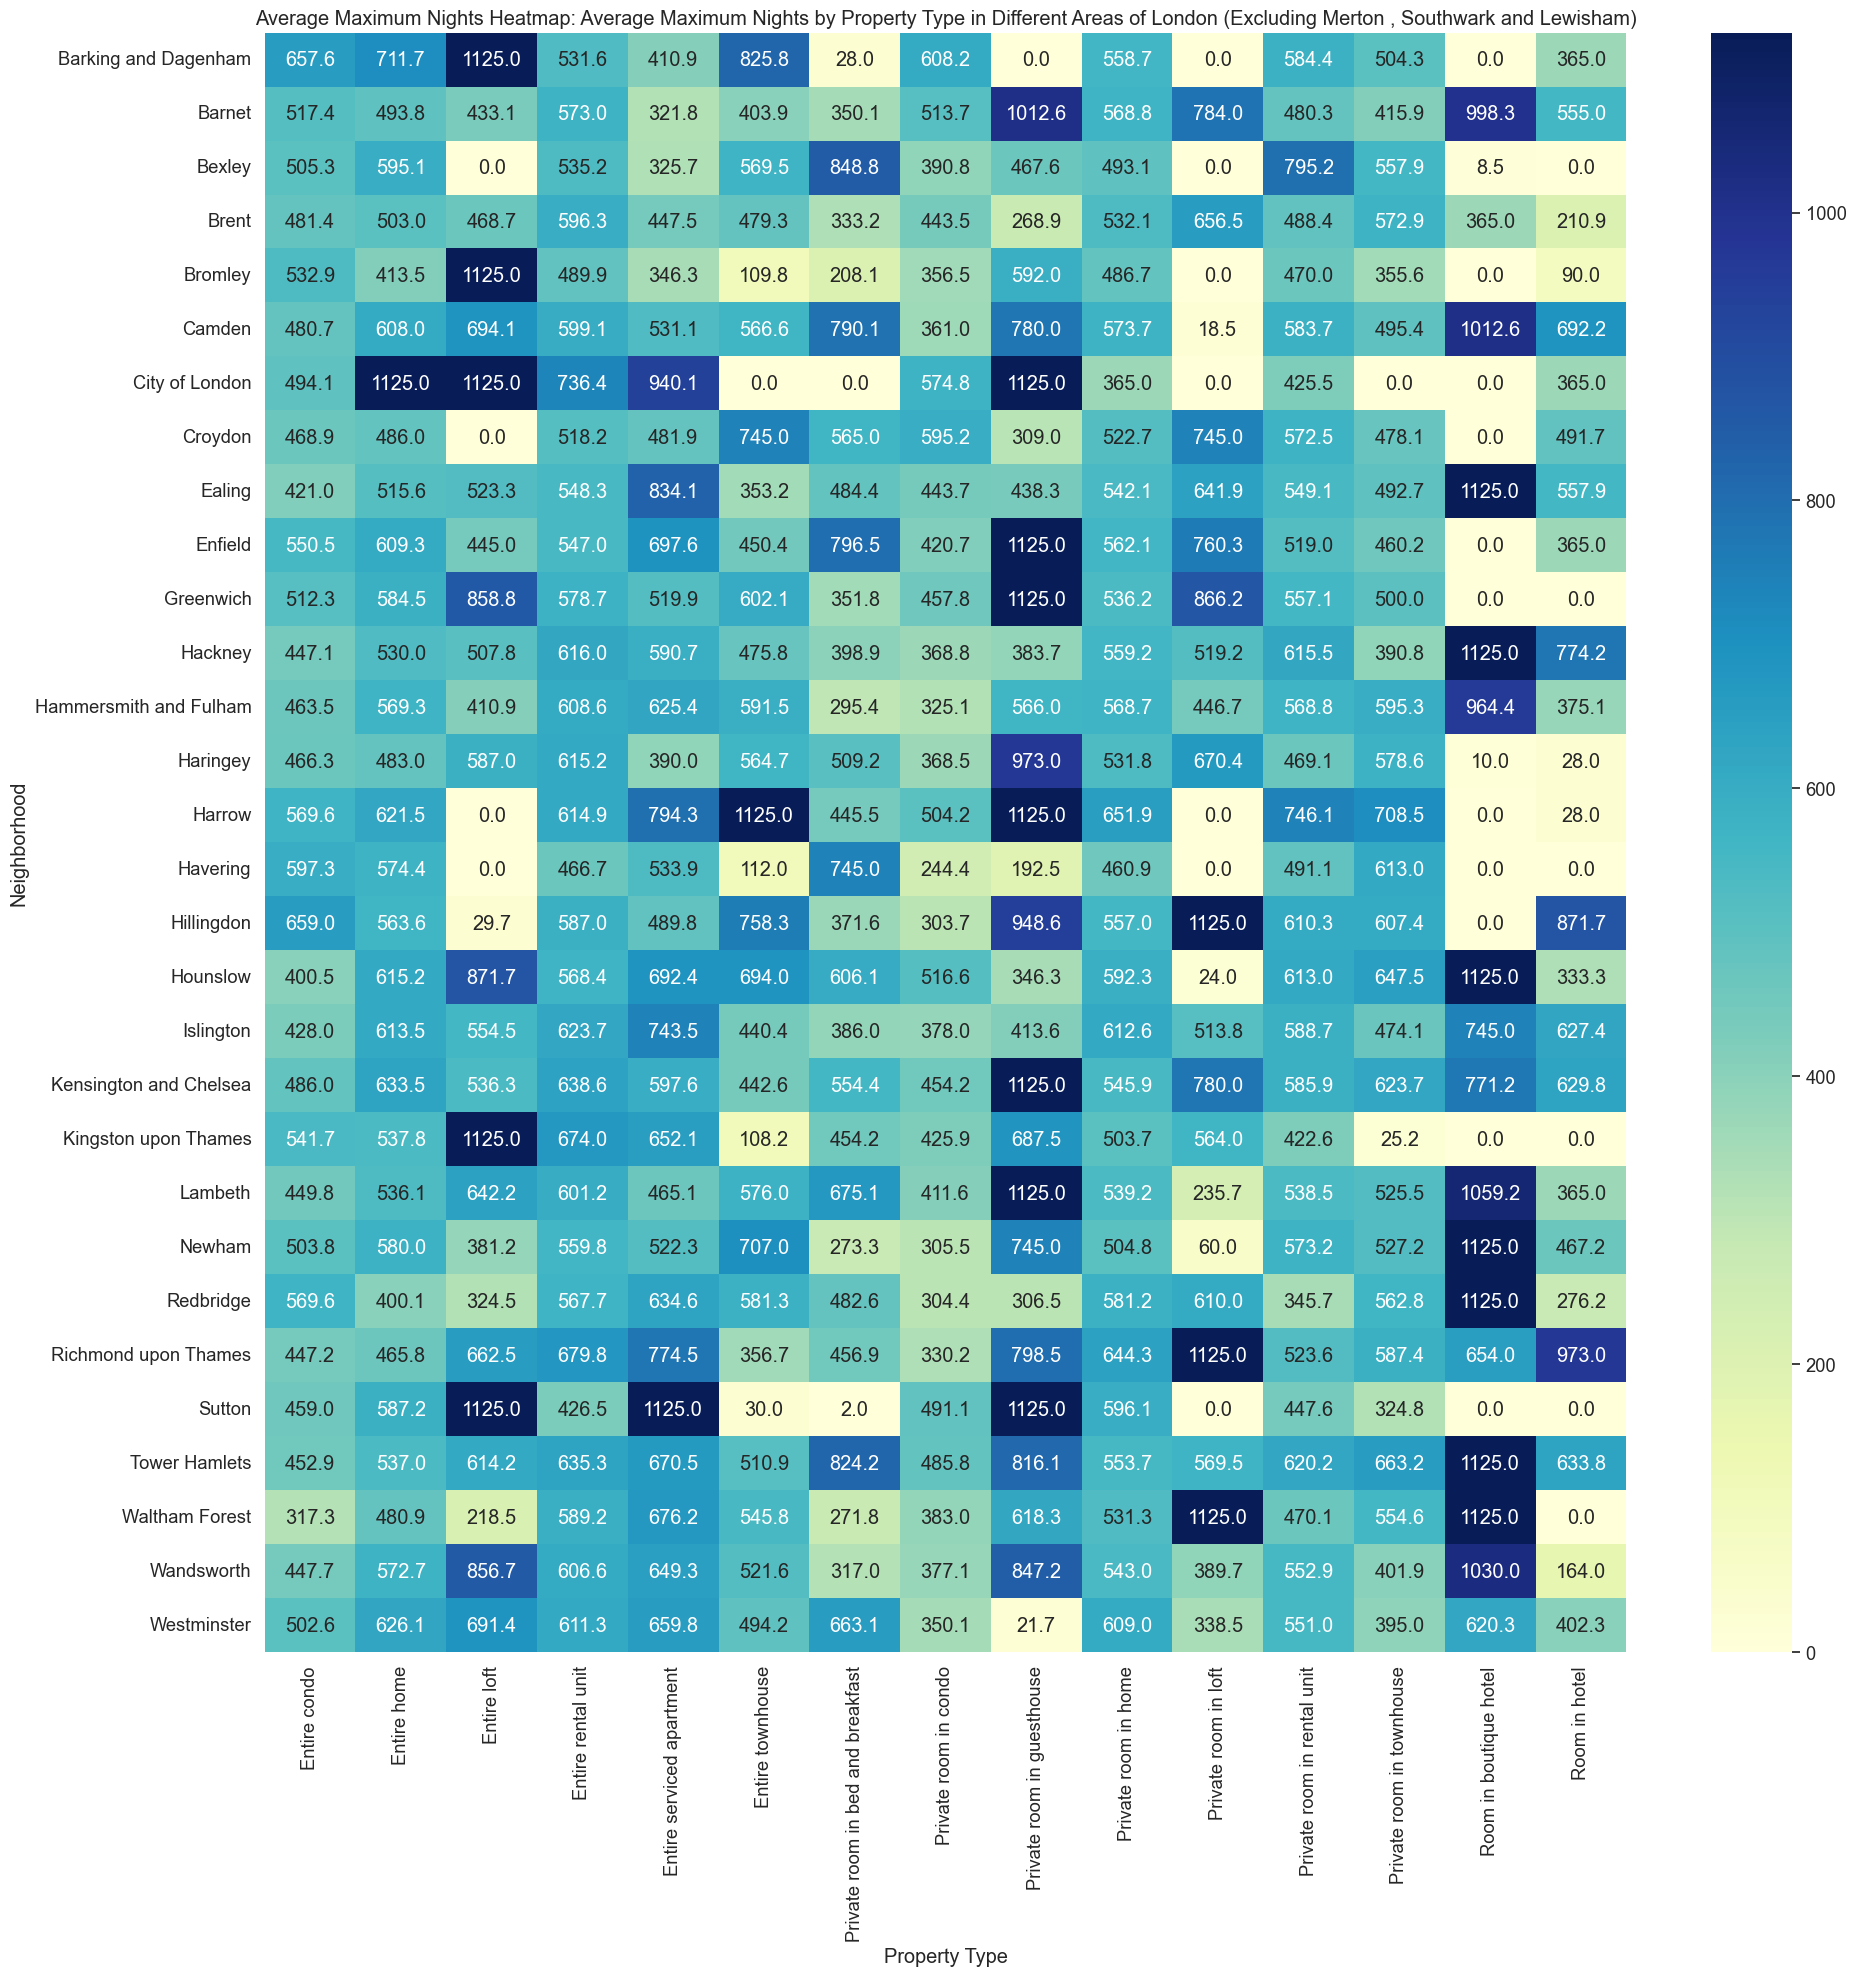

In [75]:
# Create a pivot table to transform the data for the heatmap
pivot_table = availability_metrics.pivot_table(index='neighbourhood_cleansed',
                                                        columns='property_type',
                                                        values='Average_Maximum_Nights',
                                                        fill_value=0)

# Create the heatmap
plt.figure(figsize=(20, 20))
sns.heatmap(pivot_table, cmap='YlGnBu', annot=True, fmt='.1f')
plt.xlabel('Property Type')
plt.ylabel('Neighborhood')
plt.title('Average Maximum Nights Heatmap: Average Maximum Nights by Property Type in Different Areas of London (Excluding Merton , Southwark and Lewisham)')
plt.tight_layout()
plt.show()

> Based on the analysis of average maximum nights for different property types in various neighborhoods of London, we can draw the following conclusions:

1. **Property Type Impacts Stay Duration:** Certain property types, such as 'private room in guesthouse', 'room in boutique hotel', 'entire loft', 'private room in a loft', and 'entire home', offer longer average maximum nights. This suggests that these types of accommodations are more suitable for guests looking for extended stays or longer-term rentals.

2. **Neighborhoods with Longer Stays:** There is notable variation in average maximum nights across neighborhoods. Neighborhoods like Tower Hamlets, City of London, Greenwich, and Sutton stand out with higher average maximum nights. These areas might be more attractive for travelers seeking longer stays or for hosts catering to guests who prefer extended rental periods.

3. **Consideration for Rental Strategy:** Hosts and travelers can utilize this information to tailor their rental strategies. Hosts may find it beneficial to offer longer-term options for properties with longer average maximum nights. On the other hand, travelers with specific duration preferences can choose neighborhoods and property types that align with their stay requirements.

4. **Potential Market Demand:** The higher average maximum nights for certain property types and neighborhoods might indicate potential demand for extended stays in these areas. Hosts could explore offering special deals or incentives for longer bookings to attract guests interested in extended visits.

In [76]:
# Group the data by 'neighbourhood_cleansed' and 'property_type'
grouped_data_2 = new_london2.groupby(['neighbourhood_cleansed', 'property_type'])

# Calculate availability metrics for each combination of neighborhood and property type
availability_metrics_2 = grouped_data_2.agg({
    'name': 'count',                     # Total number of listings
    'minimum_nights': 'mean',            # Average minimum nights
    'maximum_nights': 'mean',            # Average maximum nights
    # Add more metrics as needed based on your analysis (e.g., average price, average reviews, etc.)
})

# Rename the columns for clarity
availability_metrics_2 = availability_metrics_2.rename(columns={
    'name': 'Total_Listings',
    'minimum_nights': 'Average_Minimum_Nights',
    'maximum_nights': 'Average_Maximum_Nights'
})

# Sort the DataFrame by total listings in descending order
availability_metrics_2 = availability_metrics.sort_values(by='Total_Listings', ascending=False)

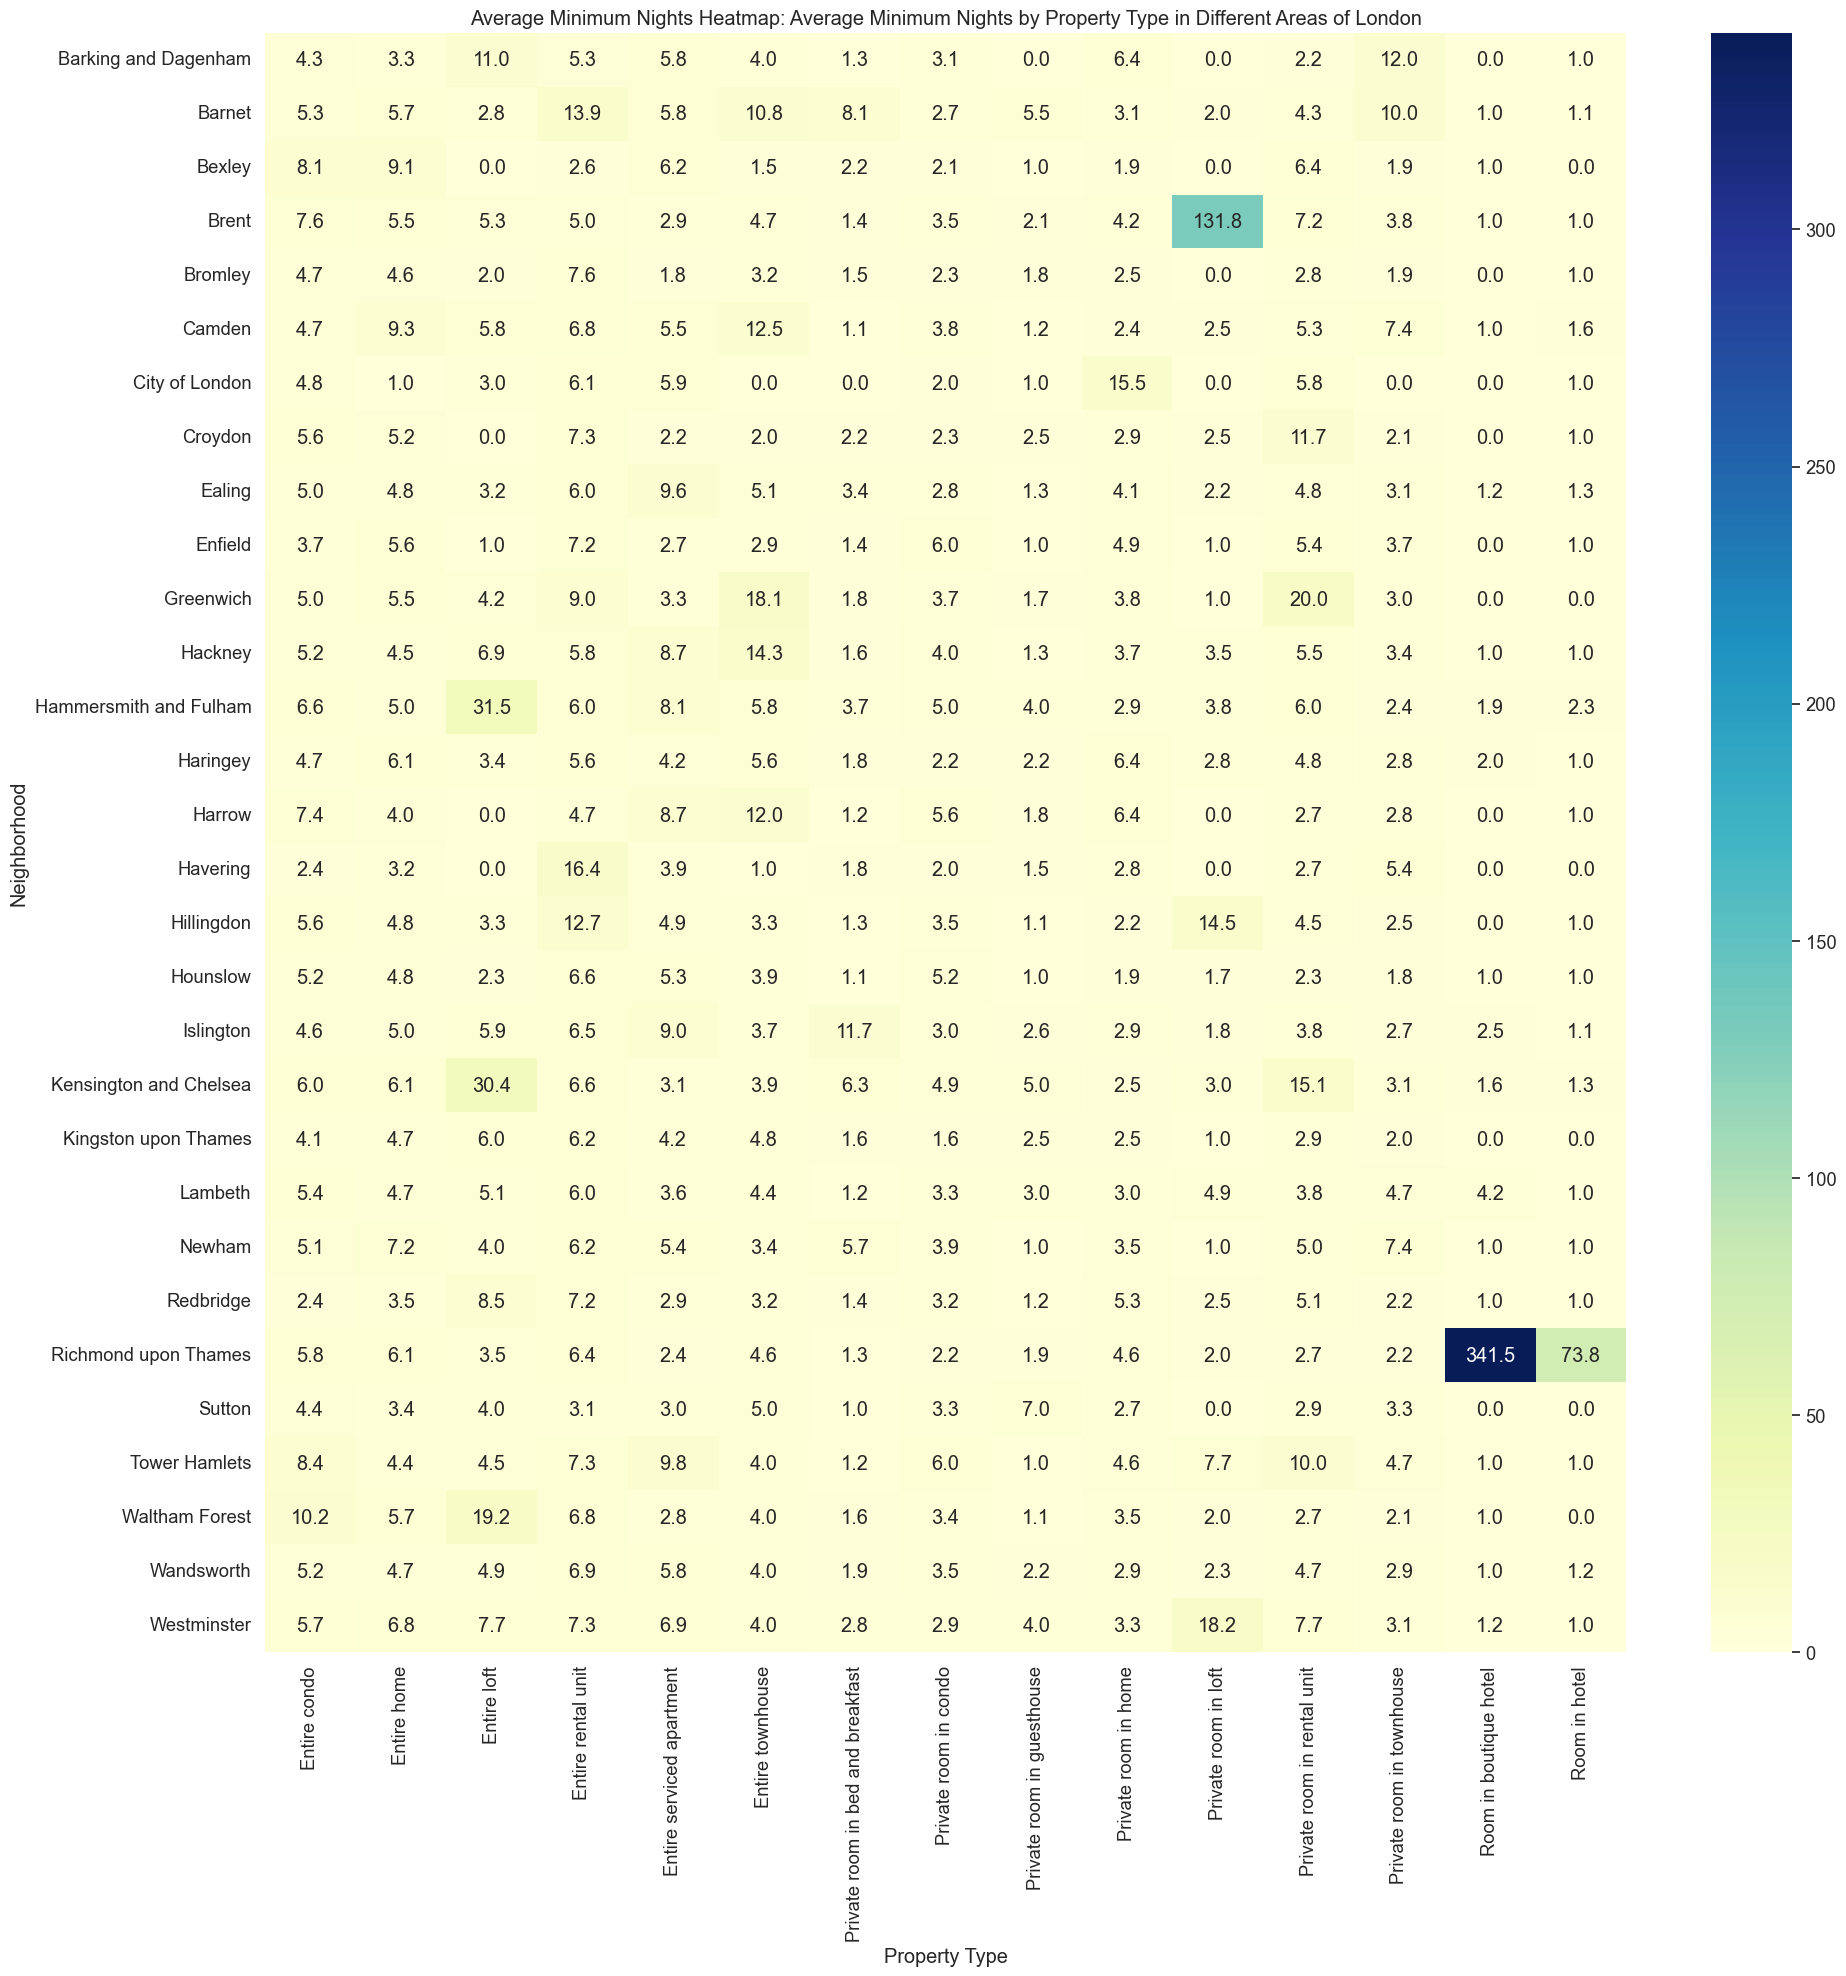

In [77]:
# Create a pivot table to transform the data for the heatmap
pivot_table = availability_metrics_2.pivot_table(index='neighbourhood_cleansed',
                                                        columns='property_type',
                                                        values='Average_Minimum_Nights',
                                                        fill_value=0)

# Create the heatmap
plt.figure(figsize=(20, 20))
sns.heatmap(pivot_table, cmap='YlGnBu', annot=True, fmt='.1f')
plt.xlabel('Property Type')
plt.ylabel('Neighborhood')
plt.title('Average Minimum Nights Heatmap: Average Minimum Nights by Property Type in Different Areas of London')
plt.tight_layout()
plt.show()

> For average minimum nights, only three data points stand out as particularly interesting:

1. **'Richmond upon Thames':** For the property type 'room in boutique hotel', the average minimum nights are 341.5. Additionally, for the same neighborhood, the property type 'room in hotel' has an average minimum nights of 73.8.

2. **'Brent':** The property type 'private room in loft' has an average minimum nights of 131.8.

However, for the majority of property types and neighborhoods, the average minimum nights are relatively similar, showing less variability across the dataset.

These observations suggest that certain property types in specific neighborhoods may require longer minimum stays, while other combinations have more flexible booking options. Hosts and travelers can consider these insights when planning their accommodations or rental strategies, depending on their preferences and desired lengths of stay.

# DESCRIPTION

## Descriptions and most expensive listings

In [78]:
# Creating a dataframe of the summaries of the 100 most expensive listings
description = new_london2[['description','price']]
description = description[pd.notnull(description['description'])]
description = description[description['description']!=0]
description = description.sort_values('price',ascending=[0])
top100DF = description.head(100)
top100DF.head()

description  price
50423  This luxurious apartment boasts a fully fitted...  10000
33176  Two bedroom flat with a living room with a dou...  10000
61262  Lovely flat very well located in Balham. Super...  10000
63360  Enjoy a stylish experience at this centrally-l...   9999
56998  Enjoy a stylish experience at this centrally-l...   9925

In [79]:
from nltk.corpus import stopwords
import string
import nltk

# Some data cleaning

words=''
for index,row in top100DF.iterrows():
    words += row['description']

string_punctuation = string.punctuation
ignoreChar=['\r','\n','',' ',"'s", 'br']
nums=['0','1','2','3','4','5','6','7','8','9']
summary_data=nltk.word_tokenize(words)
words_only = [l.lower() for l in summary_data if l not in string_punctuation if l not in ignoreChar if l not in nums]
filtered_data=[word for word in words_only if word not in stopwords.words('english')] 
wnl = nltk.WordNetLemmatizer() 
final_data=[wnl.lemmatize(data) for data in filtered_data]
final_words=' '.join(final_data)
final_words[:50]

'luxurious apartment boast fully fitted kitchen two'

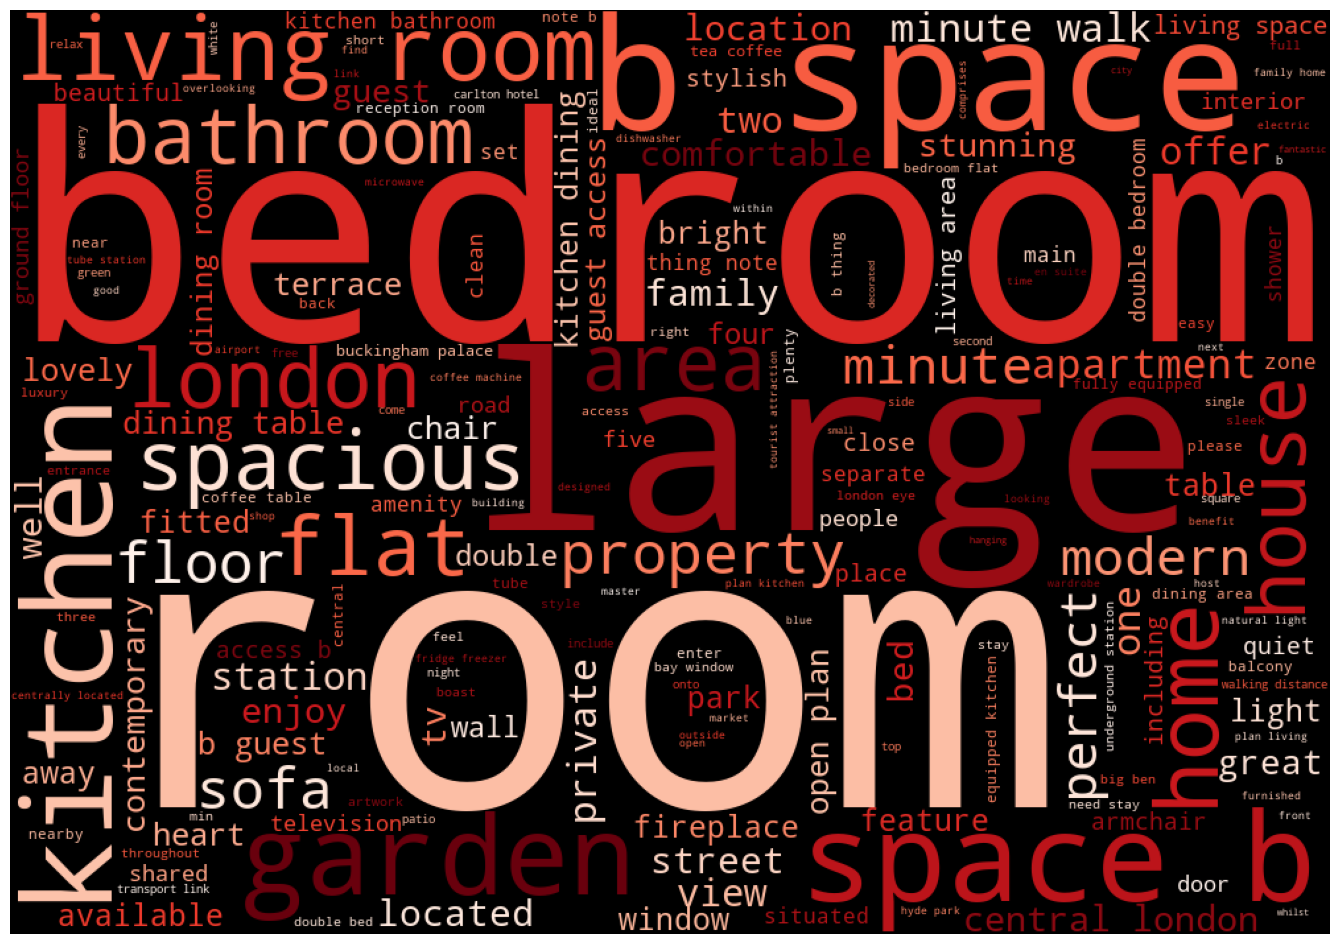

In [80]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

wordcloud = WordCloud(width = 1000, height = 700, background_color="black",colormap='Reds').generate(final_words)
plt.figure(figsize=(18,12))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

> From the word cloud above, we can observe that the descriptions of the most expensive listings consistently feature three common words: 'room', 'bedroom', and 'large'. Additionally, words such as 'space', 'kitchen', and 'garden' are also frequently present in these listings. However, it is essential to consider whether these words are simply common to all listings. To determine this, let's also analyze the descriptions of the cheapest listings and see if we can infer any patterns or distinctions.

## Descriptions and cheapest expensive listings

In [81]:
# Creating a dataframe of the summaries of the 100 most cheapest listings
description_low = new_london2[['description','price']]
description_low = description_low[pd.notnull(description_low['description'])]
description_low = description_low[description_low['description']!=0]
description_low = description_low.sort_values('price',ascending=[1])
bottom100DF = description_low.head(100)
bottom100DF.sample(n=5)

description  price
66433  A lovely country-style cottage  next to a wood...      8
44387  Note: You can directly book the best price if ...     13
2447   Cosy double room in a spacious and light three...     15
27250  Close to Morden  Station and please check in a...     15
68737  The modern rooms have built in wardrobes, crea...     15

In [82]:
# Some data cleaning

words=''
for index,row in bottom100DF.iterrows():
    words += row['description']

string_punctuation = string.punctuation
ignoreChar=['\r','\n','',' ',"'s", 'br']
nums=['0','1','2','3','4','5','6','7','8','9']
summary_data=nltk.word_tokenize(words)
words_only = [l.lower() for l in summary_data if l not in string_punctuation if l not in ignoreChar if l not in nums]
filtered_data=[word for word in words_only if word not in stopwords.words('english')] 
wnl = nltk.WordNetLemmatizer() 
final_data=[wnl.lemmatize(data) for data in filtered_data]
final_words=' '.join(final_data)
final_words[:50]

'panoramic 9th floor skyline view private balcony q'

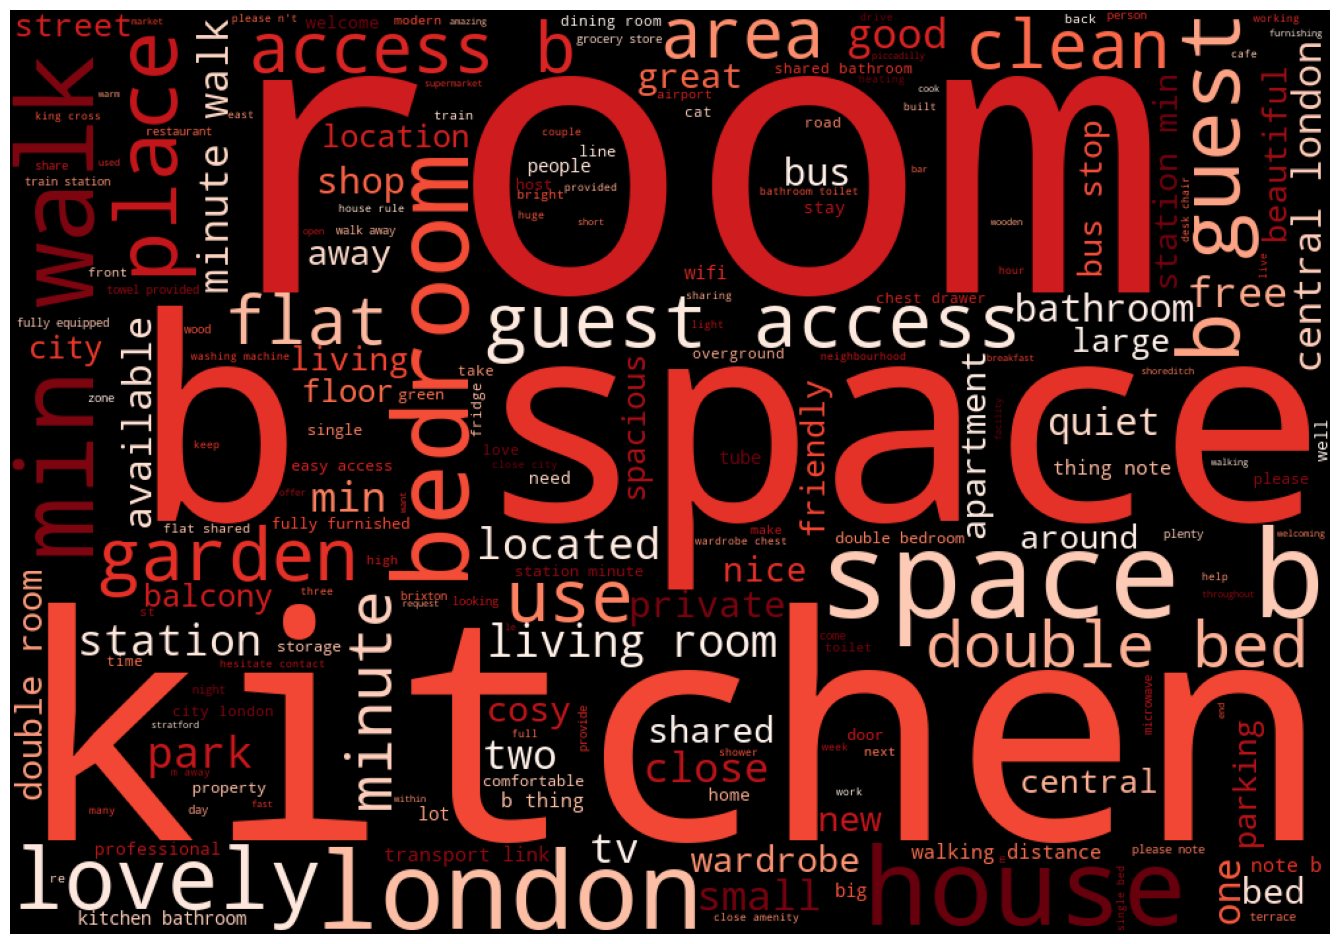

In [83]:
wordcloud = WordCloud(width = 1000, height = 700, background_color="black", colormap='Reds').generate(final_words)
plt.figure(figsize=(18,12))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()


> From the word cloud above, we can observe that the descriptions of the least expensive listings share three common words: 'kitchen', 'room', and 'space'. Additionally, words such as 'london', 'bedroom', and 'house' also frequently appear in these listings. Interestingly, these words, like 'kitchen', 'space', 'room', and 'bedroom', appear frequently in both sets of listings.

> Based on the price, we can conclude that certain words appear more frequently than others. For instance, in the more expensive listings, words such as 'view', 'modern', and 'walk' are more prevalent. Thus, specific words seem to be associated with different price ranges.

<br> 
​
<div class="alert alert-info"><b>DESCRIPTIONS CONCLUSIONS</b> 
    

Based on the analysis of the word clouds for both the most expensive and least expensive listings, we can draw several conclusions:

Common Words: Both the most expensive and least expensive listings frequently mention words like 'room', 'bedroom', 'kitchen', and 'space'. These words appear to be commonly used across various types of listings, regardless of their price.

Distinctive Words: However, there are certain words that are more distinct to each price category. For the most expensive listings, words like 'large', 'view', 'modern', and 'walk' stand out, suggesting that these features might be more prevalent in higher-priced properties. On the other hand, words like 'london', 'bedroom', and 'house' appear more frequently in the descriptions of the least expensive listings.

Price Association: The distinctive words in each set of listings hint at features or characteristics that might be associated with different price ranges. For example, larger spaces, attractive views, and modern amenities might contribute to higher prices, while proximity to London and the number of bedrooms could be factors impacting lower prices.

Overall, the analysis suggests that certain words are more indicative of the price range in the real estate listings. However, it's important to remember that this analysis is based solely on the word frequencies in the descriptions, and other factors such as location, condition, and amenities may also influence the property prices.

# REVIEWS 

In [84]:
file_path_reviews = r"C:\Users\BDS CREATIONS\OneDrive\Bureau\OPEN CLASS ROOM\DOSSIER PYTHON\reviews.csv.gz"
# Read the compressed CSV file into a pandas DataFrame
reviews = pd.read_csv(file_path_reviews)
reviews = reviews.dropna()
# Let's take a look at the DataFrame.
reviews.head()

listing_id      id        date  reviewer_id reviewer_name  \
0       13913   80770  2010-08-18       177109       Michael   
1       13913  367568  2011-07-11     19835707       Mathias   
2       13913  529579  2011-09-13      1110304       Kristin   
3       13913  595481  2011-10-03      1216358       Camilla   
4       13913  612947  2011-10-09       490840         Jorik   

                                            comments  
0  My girlfriend and I hadn't known Alina before ...  
1  Alina was a really good host. The flat is clea...  
2  Alina is an amazing host. She made me feel rig...  
3  Alina's place is so nice, the room is big and ...  
4  Nice location in Islington area, good for shor...

In [85]:
# Filter the column date to only keep the year 2023
# First, convert the 'date' column to a datetime data type if it's not already
reviews['date'] = pd.to_datetime(reviews['date'])

# Then, filter the DataFrame to include only the rows with dates in 2022 and 2023
reviews_2023 = reviews[reviews['date'].dt.year == 2023]

In [86]:
reviews_2023.shape

(79963, 6)

We will use the built-in analyzer in the NLTK Python library to assign a polarity score to each comment to retrieve the 'sentiment' of comments - 'positive','negative' or 'neutral'

In [87]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to C:\Users\BDS
[nltk_data]     CREATIONS\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [88]:
sid = SentimentIntensityAnalyzer()

reviews_2023['comments'] = reviews_2023['comments'].astype(str)

reviews_2023['polarity_value'] = "Default"
reviews_2023['neg'] = 0.0
reviews_2023['pos'] = 0.0
reviews_2023['neu'] = 0.0
reviews_2023['compound'] = 0.0

for index, row in reviews_2023.iterrows():
    ss = sid.polarity_scores(row['comments'])
    reviews_2023.at[index, 'polarity_value'] = ss
    reviews_2023.at[index, 'neg'] = ss['neg']
    reviews_2023.at[index, 'pos'] = ss['pos']
    reviews_2023.at[index, 'neu'] = ss['neu']
    reviews_2023.at[index, 'compound'] = ss['compound']

reviews_2023.head()

listing_id                  id       date  reviewer_id reviewer_name  \
1814      236956  806434377445776127 2023-01-17    320200432        Manson   
1815      236956  812155559214023289 2023-01-25    263306831        Claire   
1816      236956  819499038270913040 2023-02-04     85923930       Vaibhav   
1817      236956  826690560829705596 2023-02-14    452966517         Bowie   
1841      236956  835402223121924592 2023-02-26    380755930           Max   

                                               comments  \
1814  Extremely perfect location, ten minutes of und...   
1815  Very quiet, clean space perfect for solo trave...   
1816  You cannot beat the location. The private bedr...   
1817  Great location. The place was comfortable and ...   
1841  Donovan is a great host and is a very nice guy...   

                                         polarity_value    neg    pos    neu  \
1814  {'neg': 0.0, 'neu': 0.743, 'pos': 0.257, 'comp...  0.000  0.257  0.743   
1815  {'neg': 0.0, 'neu': 0.473, 'pos': 0.527, 'comp...  0.000  0.527  0.473   
1816  {'neg': 0.0, 'neu': 0.854, 'pos': 0.146, 'comp...  0.000  0.146  0.854   
1817  {'neg': 0.0, 'neu': 0.502, 'pos': 0.498, 'comp...  0.000  0.498  0.502   
1841  {'neg': 0.056, 'neu': 0.658, 'pos': 0.286, 'co...  0.056  0.286  0.658   

      compound  
1814    0.9674  
1815    0.7703  
1816    0.3400  
1817    0.9506  
1841    0.8777

In [89]:
reviews_2023.to_csv('polarity_reviews.csv')

Removing comments which are not in English

from langdetect import detect

def detect_lang(sente):
    sente = str(sente)
    try:
        return detect(sente)
    except:
        return "None"

for index, row in reviews_2023.iterrows():
    lang = detect_lang(row['comments'])
    reviews_2023.at[index, 'language'] = lang  

eng_reviews = reviews_2023[reviews_2023.language == 'en']
eng_reviews.head(2)


## Number of comments with positive sentiment

In [90]:
polarDF = reviews_2023[['pos']]
polarDF = polarDF.groupby(pd.cut(polarDF["pos"], np.arange(0, 1.1, 0.1))).count()
polarDF = polarDF.rename(columns={'pos': 'count_of_Comments'})
polarDF = polarDF.reset_index()
polarDF = polarDF.rename(columns={'pos': 'range_i'})

for i, r in polarDF.iterrows():
    polarDF.at[i, 'RANGE'] = float(str(r['range_i'])[1:4].replace(',', ''))
    polarDF.at[i, 'Sentiment'] = 'positive'

del polarDF['range_i']
polarDF.head()

count_of_Comments  RANGE Sentiment
0               4477    0.0  positive
1               8600    0.1  positive
2              13483    0.2  positive
3              14076    0.3  positive
4              10415    0.4  positive

## Number of comments with negative sentiment

In [91]:
polarDFneg = reviews_2023[['neg']]
polarDFneg = polarDFneg.groupby(pd.cut(polarDFneg["neg"], np.arange(0, 1.1, 0.1))).count()
polarDFneg = polarDFneg.rename(columns={'neg': 'count_of_Comments'})
polarDFneg = polarDFneg.reset_index()
polarDFneg = polarDFneg.rename(columns={'neg': 'range_i'})

for i, r in polarDFneg.iterrows():
    polarDFneg.at[i, 'RANGE'] = float(str(r['range_i'])[1:4].replace(',', ''))
    polarDFneg.at[i, 'Sentiment'] = 'negative'

del polarDFneg['range_i']

# Append the rows from polarDFneg to polarDF
for i, r in polarDFneg.iterrows():
    polarDF = polarDF.append(pd.Series([r[0], r[1], r[2]], index=['count_of_Comments', 'RANGE', 'Sentiment']), ignore_index=True)

polarDFneg.head()

count_of_Comments  RANGE Sentiment
0              13488    0.0  negative
1               2790    0.1  negative
2                794    0.2  negative
3                296    0.3  negative
4                108    0.4  negative

## Number of comments with neutral sentiment

In [92]:
polarDFnut=reviews_2023[['neu']]
polarDFnut=polarDFnut.groupby(pd.cut(polarDFnut["neu"], np.arange(0, 1.0, 0.1))).count()
polarDFnut=polarDFnut.rename(columns={'neu':'count_of_Comments'})
polarDFnut=polarDFnut.reset_index()
polarDFnut=polarDFnut.rename(columns={'neu':'range_i'})
for i,r in polarDFnut.iterrows():
    polarDFnut.at[i,'RANGE'] = float(str(r['range_i'])[1:4].replace(',','')) 
    polarDFnut.at[i,'Sentiment']='neutrl'
del polarDFnut['range_i']

for i,r in polarDFnut.iterrows():
    polarDF=polarDF.append(pd.Series([r[0],r[1],r[2]],index=['count_of_Comments','RANGE','Sentiment']),ignore_index=True)
    
polarDFnut.head()

count_of_Comments  RANGE Sentiment
0                 26    0.0    neutrl
1               1011    0.1    neutrl
2               2838    0.2    neutrl
3               4034    0.3    neutrl
4               6997    0.4    neutrl

<Figure size 1000x1000 with 0 Axes>

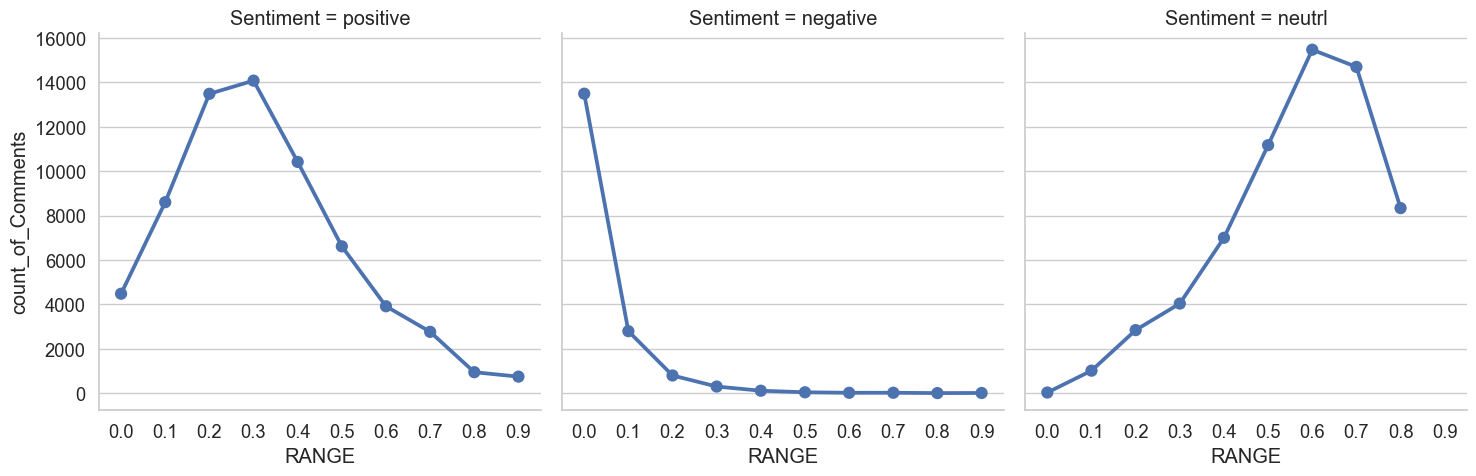

In [93]:
# Visualizing the sentiment counts

plt.figure(figsize=(10,10))
sns.factorplot(data=polarDF, x="RANGE", y="count_of_Comments",col="Sentiment")

> 1-Negativity in Reviews: Most reviews have low levels of negativity, with only a few exhibiting a slight negative sentiment. The majority of reviews fall into the 0.0 negative sentiment category, indicating that customers generally have a positive or neutral outlook in their comments.

> 2-Positivity in Reviews: There is a considerable number of reviews expressing a reasonable degree of positivity. This suggests that a significant proportion of customers are satisfied or pleased with the product, service, or experience they are reviewing.

> 3-Neutrality in Reviews: The dominant sentiment observed in the reviews is neutrality. A large portion of customers expresses opinions without leaning strongly towards either positivity or negativity. This prevalence of neutrality may make it challenging to make definitive judgments about sentiment towards specific aspects, such as pricing, as most reviews fall into the neutral category.

>> Overall, the analysis suggests that while there is a slight inclination towards positive sentiments, the majority of reviews are written with a neutral sentiment. This indicates that customers' feedback and opinions are generally balanced and do not strongly lean towards either positive or negative sentiments.

## Number of reviews & Price

In [94]:
file_path = r"C:\Users\BDS CREATIONS\OneDrive\Bureau\OPEN CLASS ROOM\DOSSIER PYTHON\listings.csv.gz"
# Read the compressed CSV file into a pandas DataFrame
listing = pd.read_csv(file_path)
listing=listing[['number_of_reviews','price','review_scores_rating']]

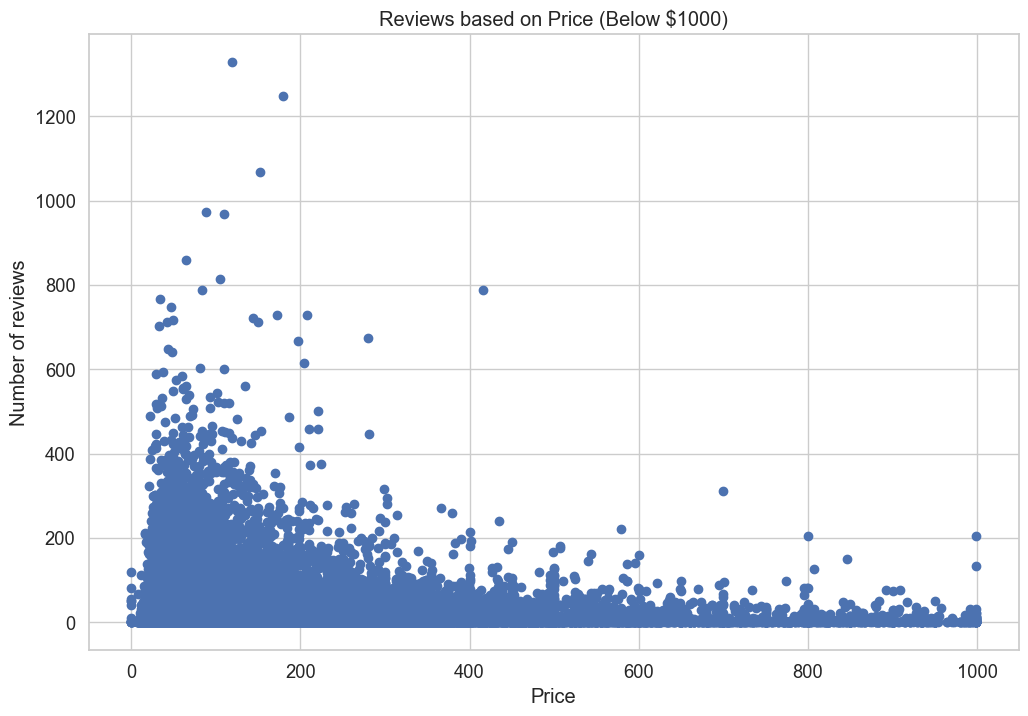

In [95]:
# Replacing NaN values with 0
listing.fillna(0, inplace=True)

# Extracting prices from the table and cleaning the data
price = listing['price']
prices = []

for p in price:
    p_str = str(p)  # Convert the price to a string first
    p_cleaned = float(p_str[1:].replace(',', ''))  # Clean the string and convert to float
    prices.append(p_cleaned)

# Replace the price column with the new column
listing['price'] = prices

# Filter the prices below $1000
filtered_listing = listing[listing['price'] < 1000]

# Create the plot using the filtered data
price_review = filtered_listing[['number_of_reviews', 'price']].sort_values(by='price')

price_review.plot(x='price',
                  y='number_of_reviews',
                  style='o',
                  figsize=(12, 8),
                  legend=False,
                  title='Reviews based on Price (Below $1000)')

plt.xlabel("Price")
plt.ylabel("Number of reviews")

plt.show()

> Based on the information provided and the observation from the plot, we can draw the following conclusion:

>> The plot indicates that there is a substantial number of reviews for listings with prices between $0 and $200. This suggests that a significant portion of the listings falls within this price range, attracting a considerable amount of customer feedback and attention. Further analysis and exploration of the data could reveal additional insights into the popularity and customer satisfaction levels for these listings in the given price range.

<AxesSubplot:>

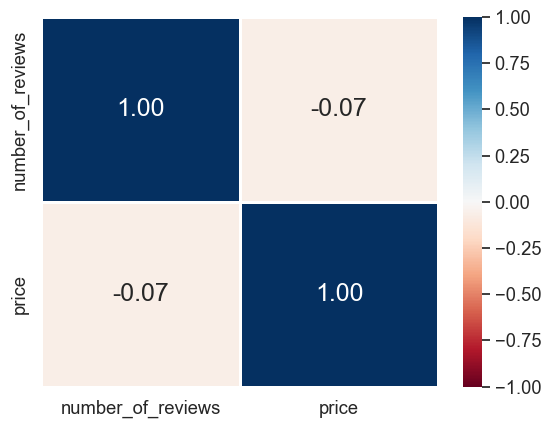

In [96]:
sns.heatmap(price_review.corr(), vmin = -1, vmax = 1, linewidths = 1,
           annot = True, fmt = ".2f", annot_kws = {"size": 18}, cmap = "RdBu")

> A correlation coefficient of 0.07 between "Number of Reviews" and "Price" suggests a weak positive correlation. The positive sign indicates that as the "Price" increases, there is a slight tendency for the "Number of Reviews" to increase as well. However, the correlation coefficient of 0.07 is relatively close to zero, indicating that the relationship is weak, and the two variables are not strongly correlated.

# CONCLUSION 

## How does the property type affect pricing and availability in different areas of London?

1. Property Type Distribution:
   - The dataset contains information about 95 different property types for Airbnb listings in London.
   - The most prevalent property types are "Entire home/apt" and "Private room," with "Entire rental unit" being the most common property type.
   - Certain property types, such as "room in boutique hotel," "entire loft," and "entire townhouse," are associated with higher prices in general.

2. Pricing Variation:
   - The minimum price for Airbnb listings in London is $1, while the maximum price reaches $70,111.
   - Neighborhoods such as Westminster, Kensington and Chelsea, and City of London are distinguished by significantly higher prices compared to other areas.

3. Correlation between Property Type and Pricing:
   - The heatmap analysis suggests a correlation between certain property types and higher prices. Listings with property types like "entire townhouse," "entire serviced apartment," and "entire home" have higher average prices.
   - On the other hand, property types like "private room in home," "private room in apartment," and "private room in house" tend to have lower average prices.

4. Availability Analysis:
   - The dataset provides information on availability for 30 days and 365 days for each listing.
   - Certain neighborhoods exhibit higher availability, indicating that they might be more accommodating to long-term stays.

5. Neighborhood Impact:
   - Certain neighborhoods, such as Westminster, Tower Hamlets, Hackney, and Camden, have the highest number of Airbnb listings.
   - Different neighborhoods show variations in pricing and availability for different property types.

6. Property Type Preferences:
   - Hosts in London prefer to list their properties as "Entire rental unit" rather than private or shared rooms.

Conclusion:
Based on the dataset, property type does have an impact on pricing and availability in different areas of London. Certain property types are associated with higher prices, and specific neighborhoods tend to have higher or lower availability for different property types. Understanding these patterns can help hosts optimize their pricing strategies and listing types based on the demand in each area. Additionally, travelers can use this information to select accommodations that align with their preferences and budget in different parts of London. However, to draw more robust conclusions and make informed decisions, further analysis and exploration of other relevant factors may be required.

## Are there any specific neighborhoods or locations in London that tend to attract more listing activity?

1. Neighborhoods with High Listing Counts:
   - The dataset indicates that certain neighborhoods have a higher number of Airbnb listings compared to others.
   - Neighborhoods such as Westminster, Tower Hamlets, Hackney, and Camden are mentioned as having a significant number of listings.
   - These neighborhoods may offer various attractions, amenities, and proximity to popular tourist destinations, making them attractive to both hosts and travelers.

2. Desirable Areas for Airbnb Hosts:
   - Locations with higher listing activity suggest that they are desirable areas for Airbnb hosts to list their properties.
   - Hosts are more likely to list their properties in neighborhoods that are popular among travelers, ensuring a steady flow of potential guests and bookings.

3. Factors Influencing Listing Activity:
   - Listing activity in certain neighborhoods may be influenced by factors such as proximity to tourist attractions, cultural sites, business districts, or public transportation hubs.
   - The availability of diverse accommodations, restaurants, entertainment venues, and other amenities in these neighborhoods can also contribute to their popularity among both hosts and guests.

4. Impact on Travelers:
   - The concentration of listing activity in specific neighborhoods provides travelers with a range of options to choose from.
   - Travelers seeking specific experiences, amenities, or price ranges can explore listings in these neighborhoods to find accommodations that meet their preferences.

5. Competition Among Hosts:
   - High listing activity in certain neighborhoods may lead to increased competition among hosts.
   - Hosts in these neighborhoods may need to employ effective pricing strategies, excellent amenities, and outstanding guest experiences to stand out in a competitive market.

Conclusion:
Based on the analysis, it is evident that certain neighborhoods in London tend to attract more listing activity on the Airbnb platform. Westminster, Tower Hamlets, Hackney, and Camden are among the neighborhoods with a higher concentration of listings. 
These neighborhoods offer diverse attractions, amenities, and proximity to popular landmarks, making them appealing to both hosts and travelers. For hosts, listing properties in these desirable areas can lead to increased booking opportunities, while travelers can benefit from a wide selection of accommodations to choose from. 
The popularity of these neighborhoods in the Airbnb market may be influenced by various factors, including their geographical locations, cultural significance, and availability of diverse accommodations.

## Are there any correlations between review scores and price?

The dataset does not explicitly state the presence of a direct correlation between review scores and price. However, we can hypothesize potential relationships based on the information given:

1. Positive Review Scores and Higher Prices:
   - It is reasonable to assume that listings with higher review scores are more likely to be associated with higher prices.
   - Positive review scores indicate guest satisfaction and positive experiences, which can justify higher pricing for the quality of the accommodation or service provided.

2. Negative Review Scores and Lower Prices:
   - Conversely, listings with lower review scores may be associated with lower prices, as negative feedback could impact the perceived value of the listing.
   - Hosts might adjust prices downwards to attract guests and compensate for lower satisfaction levels.

3. Review Scores and Pricing Strategies:
   - Hosts who consistently receive positive review scores may strategically set higher prices, confident that the quality of their offering justifies the cost.
   - On the other hand, hosts with lower review scores might adopt competitive pricing to attract guests despite potential concerns.

4. Importance of Other Factors:
   - While review scores can play a role in determining pricing, it's essential to consider other factors that may influence pricing decisions.
   - Factors such as property type, location, amenities, demand, and competition also contribute to the pricing strategy of listings.

Conclusion:
Based on the information provided, we can infer that there might be some correlations between review scores and pricing in the London Airbnb dataset. Higher review scores may be associated with higher prices, while lower review scores may influence lower prices. However, to draw definitive conclusions and quantify the strength of these correlations, additional analysis, such as data visualization and calculation of correlation coefficients, is necessary. It is essential to consider other variables and factors that may influence pricing decisions to fully understand the relationship between review scores and pricing in the Airbnb market. Hosts should aim to provide excellent guest experiences to receive positive reviews, which can potentially support competitive pricing and overall success in the Airbnb platform.

## How do the number of reviews and review scores impact the popularity and success of listings?

The number of reviews and review scores can significantly impact the popularity and success of listings in the following ways:

1. Popularity and Number of Reviews:
   - Listings with a higher number of reviews are generally more popular and attract more attention from potential guests.
   - A higher number of reviews indicates that the listing has been experienced by many guests, contributing to its credibility and reputation.
   - Popular listings with a large number of reviews are more likely to receive a higher volume of inquiries and bookings, leading to increased occupancy rates.

2. Success and Review Scores:
   - Review scores play a crucial role in determining the success of a listing on the Airbnb platform.
   - Listings with higher review scores are perceived as successful, as they reflect a higher level of guest satisfaction and positive experiences.
   - Positive review scores contribute to the overall reputation of the listing, attracting more guests and enhancing the host's credibility.

3. Guest Decision-Making:
   - Potential guests often rely on review scores to assess the quality and suitability of a listing.
   - Positive review scores can instill confidence in potential guests, leading to a higher likelihood of bookings and a positive guest experience.

4. Impact on Booking Rates:
   - Listings with positive reviews and high review scores are more likely to attract bookings from potential guests.
   - Positive reviews create trust and confidence in the listing, encouraging guests to make reservations.

5. Continuous Improvement:
   - Hosts can leverage guest feedback from reviews to make improvements and enhance the overall guest experience.
   - Addressing any concerns raised in reviews and striving for positive guest experiences can lead to higher review scores and increased listing success.

6. Word of Mouth and Referrals:
   - Listings with positive reviews are more likely to receive word-of-mouth recommendations from satisfied guests.
   - Happy guests may refer the listing to friends and family, leading to additional bookings and increased popularity.

Conclusion:
Based on the information provided, it is evident that the number of reviews and review scores have a substantial impact on the popularity and success of listings on the Airbnb platform. Listings with higher numbers of reviews are perceived as more popular and credible, attracting more inquiries and bookings. Positive review scores are essential for the success of a listing, as they contribute to the host's reputation and overall guest satisfaction. Hosts should prioritize providing excellent guest experiences and continuously seeking feedback to improve their listings' review scores and enhance their overall success on the Airbnb platform.